# "Forecasting: [...] Practice"

This jupyter notebook is based on the book "Forecasting: Principles and Practice" by R.J. Hyndman and G. Athanasopoulos (https://otexts.com/fpp3/). Here I develope some of the codes used in the book but adapted to Python.

Each section should be self-contain so that you do not need to run all the previous code.

## 1.- Getting started

### 1.1.- What can be forecast ? 

The predictability of an event or a quantity depends on several factors including:

* how well we understand the factors that contribute to it;
* how much data is available;
* how similar the future is to the past;
* whether the forecasts can affect the thing we are trying to forecast.

### 1.6.- The basic steps in a forecasting task

* Step 1: Problem definition.
* Step 2: Gathering information.
* Step 3: Preliminary (exploratory) analysis.
* Step 4: Choosing and fitting models.
* Step 5: Using and evaluating a forecasting model.


## 2.- Time series graphics

### 2.1.- _Pandas Data Frame_ objects

In [1]:
import os 
import pandas as pd 
from dotenv import load_dotenv

load_dotenv() 
base_path = os.environ['PATH_SERIES']
path_temp = os.path.join(base_path,'temp_carrielsur.csv')

df = pd.read_csv(path_temp,names = ['Timestamp','Temperature'],header=0)
df.set_index(pd.to_datetime(df['Timestamp']),inplace = True)
df = df[['Temperature']]

In [37]:
df.describe()

,Temperature
count,209228.000000
mean,13.020512
std,4.258447
min,-0.600000
25%,10.500000
50%,12.800000
75%,15.500000
max,34.000000


### 2.2.- Time plots

In [ ]:
import os 
import pandas as pd 
from dotenv import load_dotenv
import matplotlib.pyplot as plt

load_dotenv() 
base_path = os.environ['PATH_SERIES']
path_temp = os.path.join(base_path,'temp_carrielsur.csv')

df = pd.read_csv(path_temp,names = ['Timestamp','Temperature'],header=0)
df.set_index(pd.to_datetime(df['Timestamp']),inplace = True)
df = df[['Temperature']]

<Figure size 800x1200 with 0 Axes>

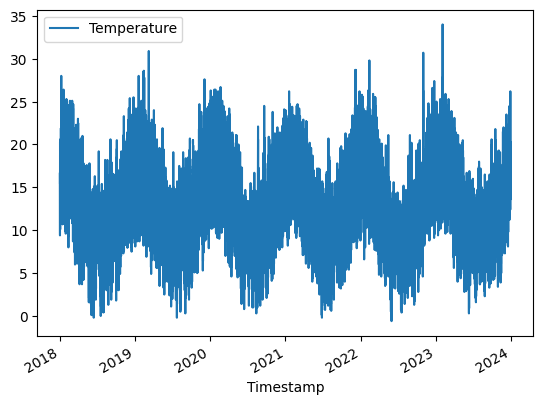

<Figure size 800x1200 with 0 Axes>

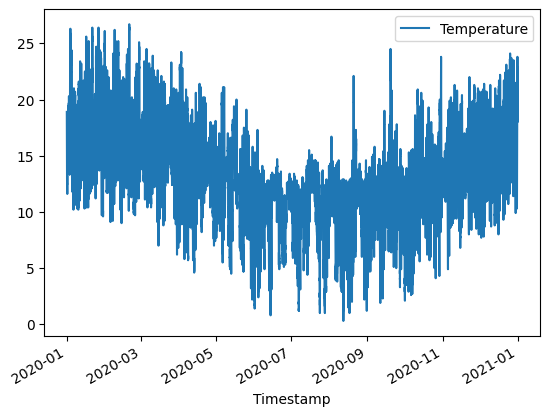

<Figure size 800x1200 with 0 Axes>

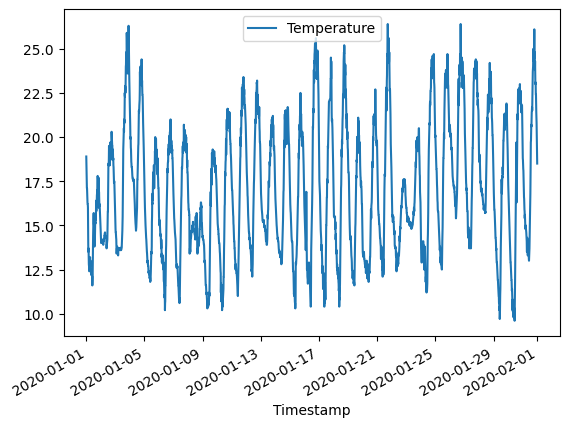

<Figure size 800x1200 with 0 Axes>

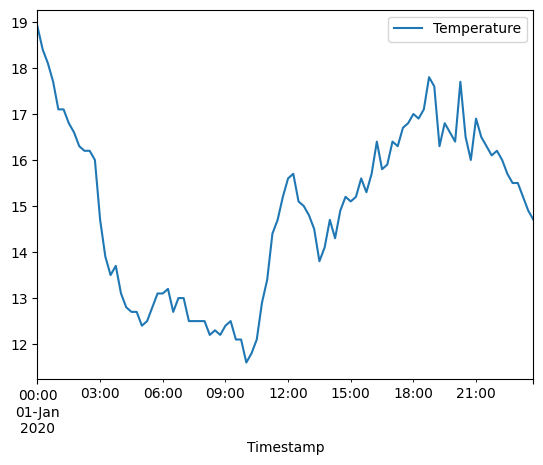

In [36]:
plt.figure(figsize = (8,12))
df.plot()
plt.show()

plt.figure(figsize = (8,12))
df.loc['2020'].plot()
plt.show()

plt.figure(figsize = (8,12))
df.loc['2020-01'].plot()
plt.show()

plt.figure(figsize = (8,12))
df.loc['2020-01-01'].plot()
plt.show()

### 2.3.- Time series patterns

* **Trend:** A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear.
* **Seasonal:** A seasonal pattern occurs when a time series is affected by seasonal factors such as the time of the year or the day of the week. Seasonality is always of a fixed and known period.
* **Cyclic:** A cycle occurs when the data exhibit rises and falls that are not of a fixed frequency.

### 2.4.- Seasonal plots

In [38]:
import os 
import numpy as np
import pandas as pd 
from dotenv import load_dotenv
import matplotlib.pyplot as plt

load_dotenv() 
base_path = os.environ['PATH_SERIES']
path_temp = os.path.join(base_path,'temp_carrielsur.csv')

df = pd.read_csv(path_temp,names = ['Timestamp','Temperature'],header=0)
df.set_index(pd.to_datetime(df['Timestamp']),inplace = True)
df = df[['Temperature']]

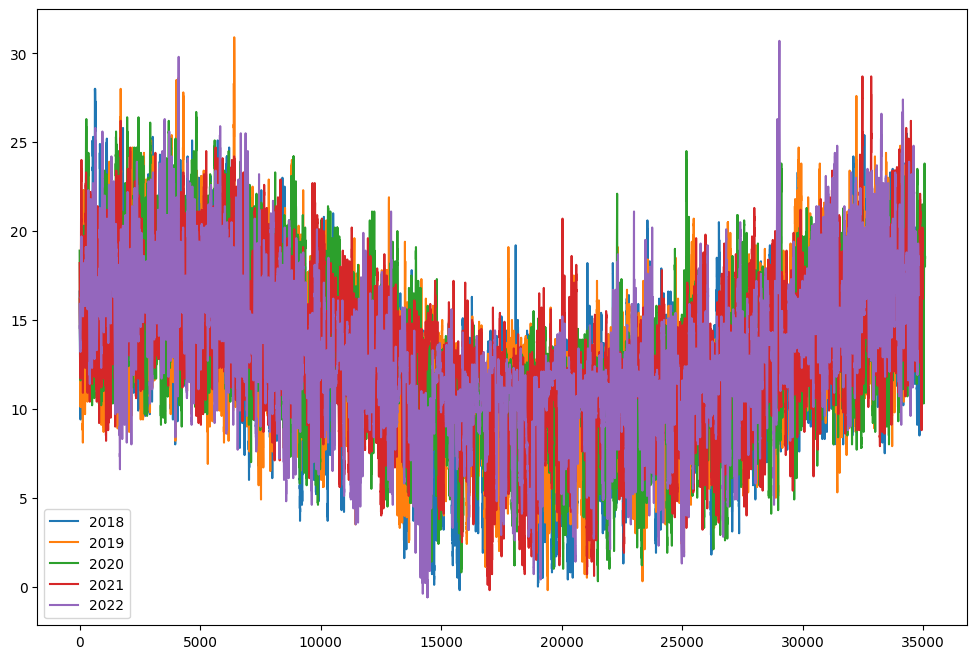

In [93]:
plt.figure(figsize = (12,8)) 
for year in range(2018,2023):
    plt.plot(df.loc[str(year)].values,label = str(year))
    plt.legend()
#plt.xticks(np.arange(0,12),np.arange(1,13))
plt.show()

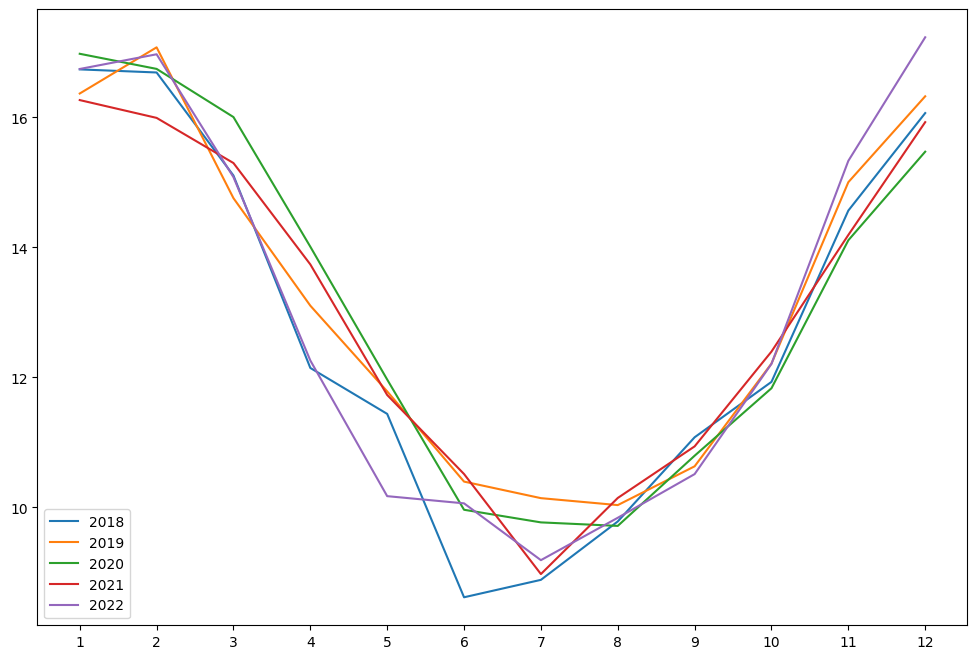

In [91]:
plt.figure(figsize = (12,8)) 
for year in range(2018,2023):
    plt.plot(df.loc[str(year)].resample('1ME').mean().values,label = str(year))
    plt.legend()
plt.xticks(np.arange(0,12),np.arange(1,13))
plt.show()

### 2.5.- Seasonal subseries plots

In [63]:
import os 
import numpy as np
import pandas as pd 
from dotenv import load_dotenv
import matplotlib.pyplot as plt

load_dotenv() 
base_path = os.environ['PATH_SERIES']
path_temp = os.path.join(base_path,'temp_carrielsur.csv')

df = pd.read_csv(path_temp,names = ['Timestamp','Temperature'],header=0)
df.set_index(pd.to_datetime(df['Timestamp']),inplace = True)
df = df[['Temperature']]

In [79]:
df_resample = df.resample('1ME').mean()

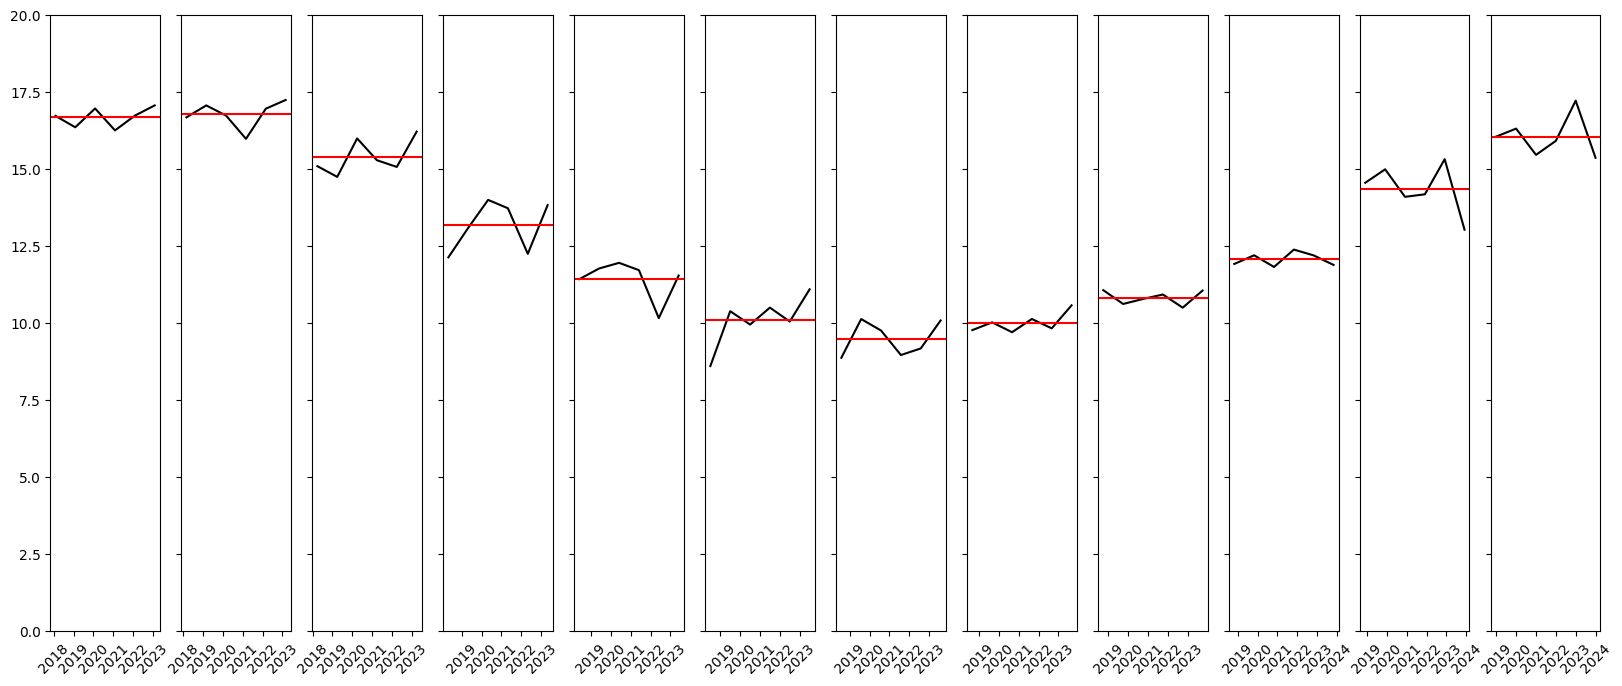

In [80]:
fig, axs = plt.subplots(1,12,figsize =(20,8),sharey = True)

for i in range(0,12):
    var_plot = df_resample[df_resample.index.month == i+1]
    axs[i].plot(var_plot, color = 'black')
    axs[i].axhline(np.mean(var_plot),color = 'red')
    axs[i].set_ylim([0,20])
    axs[i].tick_params(axis='x', rotation=45)
    

### 2.8.- Autocorrelation

In [99]:
import os 
import numpy as np
import pandas as pd 
from dotenv import load_dotenv
import matplotlib.pyplot as plt

load_dotenv() 
base_path = os.environ['PATH_SERIES']
path_temp = os.path.join(base_path,'temp_carrielsur.csv')

df = pd.read_csv(path_temp,names = ['Timestamp','Temperature'],header=0)
df.set_index(pd.to_datetime(df['Timestamp']),inplace = True)
df = df[['Temperature']]

In [145]:
df_anomaly = df.loc['2020-01-01']-np.array(df.rolling(4).mean().loc['2020-01-01'].values)

In [149]:
auto_corr = np.array([df_anomaly['Temperature'].autocorr(lag = i) for i in range(1,30)])    

[]

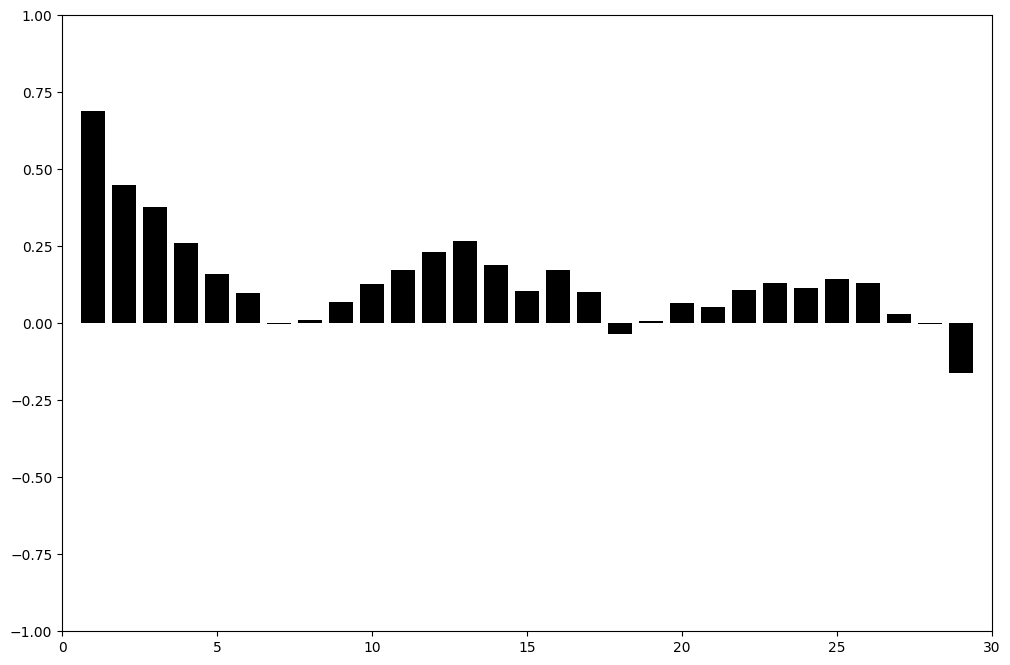

In [164]:
plt.figure(figsize=(12,8))
plt.bar(range(1,30),auto_corr,color = 'black')
plt.ylim([-1,1])
plt.xlim([0,30])
plt.plot()

### 2.9 White noise

For white noise series, we expect each autocorrelation to be close to zero. Of course, they will not be exactly equal to zero as there is some random variation. For a white noise series, we expect 95% of the spikes in the ACF to lie within $\pm 2/\sqrt{T}$ where T is the length of the time series. It is common to plot these bounds on a graph of the ACF. If one or more large spikes are outside these bounds, or if substantially more than 5% of spikes are outside these bounds, then the series is probably not white noise.

In [ ]:
import os 
import numpy as np
import pandas as pd 
from dotenv import load_dotenv
import matplotlib.pyplot as plt

load_dotenv() 
base_path = os.environ['PATH_SERIES']
path_temp = os.path.join(base_path,'temp_carrielsur.csv')

df = pd.read_csv(path_temp,names = ['Timestamp','Temperature'],header=0)
df.set_index(pd.to_datetime(df['Timestamp']),inplace = True)
df = df[['Temperature']]

In [ ]:
df_anomaly = df.loc['2020-01-01']-np.array(df.rolling(4).mean().loc['2020-01-01'].values)
auto_corr = np.array([df_anomaly['Temperature'].autocorr(lag = i) for i in range(1,30)])    

[]

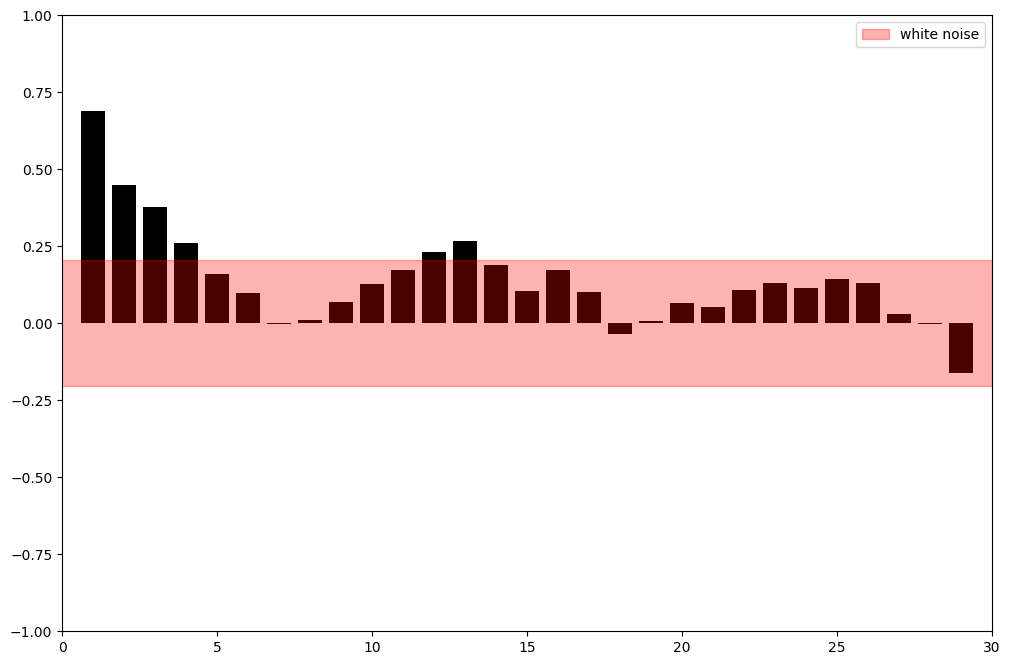

In [165]:
plt.figure(figsize=(12,8))
plt.bar(range(1,30),auto_corr,color = 'black')
plt.fill_between(range(-1,31),-2/np.sqrt(len(df_anomaly)),2/np.sqrt(len(df_anomaly)),color = 'red',alpha = 0.3,label = 'white noise')
plt.ylim([-1,1])
plt.xlim([0,30])
plt.legend()
plt.plot()

## 3.- Time series decomposition

Time series data can exhibit a variety of patterns, and it is often helpful to split a time series into several components, each representing an underlying pattern category.

### 3.1.- Transformation and adjustments

* **Calendar adjustments:** e.g.  if you are studying the total monthly sales in a retail store, there will be variation between the months simply because of the different numbers of trading days in each month, in addition to the seasonal variation across the year. It is easy to remove this variation by computing average sales per trading day in each month, rather than total sales in the month. Then we effectively remove the calendar variation.
* **Population adjustments:** Any data that are affected by population changes can be adjusted to give per-capita data.
* **Inflation adjustments:** Data which are affected by the value of money are best adjusted before modelling. [...] To make these adjustments, a price index is used. If  $z_{t}$ denotes the price index and  $y_{t}$ denotes the original house price in year  $t$, then  $x_{t} = y_{t}/z_{t} \cdot z_{2000}$ gives the adjusted house price at year 2000 dollar values. Price indexes are often constructed by government agencies. For consumer goods, a common price index is the Consumer Price Index (or CPI).
* **Mathematical transformation:** If the data shows variation that increases or decreases with the level of the series, then a transformation can be useful.

A useful family of transformations, that includes both logarithms and power transformations, is the family of Box-Cox transformations (Box & Cox, 1964), which depend on the parameter $\lambda$ and are defined as follows:

$
w_{t} = \log(y_{t}),\qquad \lambda = 0\\
w_{t} = (\text{sign}(y_{t})|y_{t}|^{\lambda}-1)/\lambda,\qquad \text{otherwise}.
$

In [1]:
import statsmodels.api as sm
#from scipy import stats
from sktime.transformations.series.boxcox import BoxCoxTransformer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#Datasets: https://github.com/vincentarelbundock/Rdatasets/blob/master/datasets.csv

df = sm.datasets.get_rdataset('GoldSilver','AER').data
df.index = pd.to_datetime(df.index)

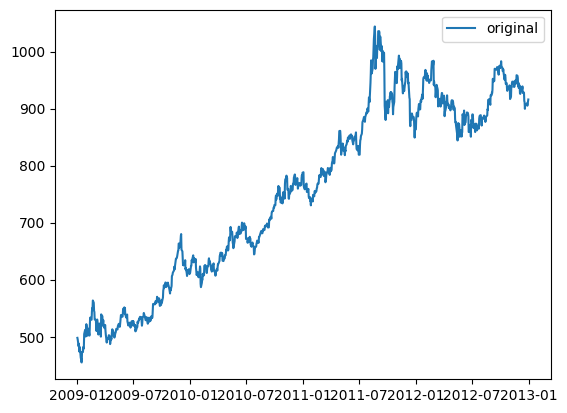

In [24]:
plt.figure()
plt.plot(df.loc['2009':'2012']['gold'], label = 'original')
plt.legend()
plt.show()

In [18]:
transformer = BoxCoxTransformer(method='guerrero',sp = 3)
y_hat = transformer.fit_transform(df.loc['2009':'2012']['gold'])
transformer.get_fitted_params()

#ts_boxcox, lmda = stats.boxcox(df.loc['2009':'2012']['gold'])
#ts_boxcox_10= stats.boxcox(df.loc['2009':'2012']['gold'],lmbda=0.9)

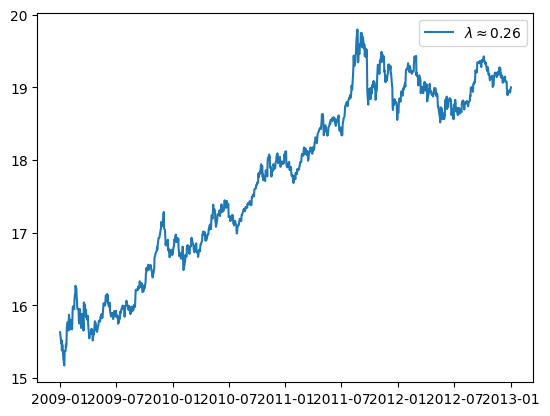

In [22]:
plt.figure()
plt.plot(df.loc['2009':'2012'].index,y_hat, label= r'$\lambda \approx 0.26$')
plt.legend()
plt.show()

### 3.2.- Time series components

If we assume an additive decomposition, then we can write $y_{t} = S_{t}+T_{t}+R_{t}$, where  $y_{t}$ is the data,  $S_{t}$ is the seasonal component, $T_{t}$ is the trend-cycle component, and $R_{t}$ is the remainder component, all at period $t$. Alternatively, a multiplicative decomposition would be written as $y_{t} = S_{t}\times T_{t}\times R_{t}$.

The additive decomposition is the most appropriate if the magnitude of the seasonal fluctuations, or the variation around the trend-cycle, does not vary with the level of the time series. When the variation in the seasonal pattern, or the variation around the trend-cycle, appears to be proportional to the level of the time series, then a multiplicative decomposition is more appropriate. Multiplicative decompositions are common with economic time series.

An alternative to using a multiplicative decomposition is to first transform the data until the variation in the series appears to be stable over time, then use an additive decomposition. When a log transformation has been used, this is equivalent to using a multiplicative decomposition on the original data because $y_{t} = S_{t}\times T_{t}\times R_{t}$ is equivalent to $\log(y_{t}) = \log(S_{t})+\log(T_{t})+\log(R_{t})$.

### 3.3.- Moving averages

In [ ]:
import statsmodels.api as sm
#from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#Datasets: https://github.com/vincentarelbundock/Rdatasets/blob/master/datasets.csv

df = sm.datasets.get_rdataset('GoldSilver','AER').data
df.index = pd.to_datetime(df.index)

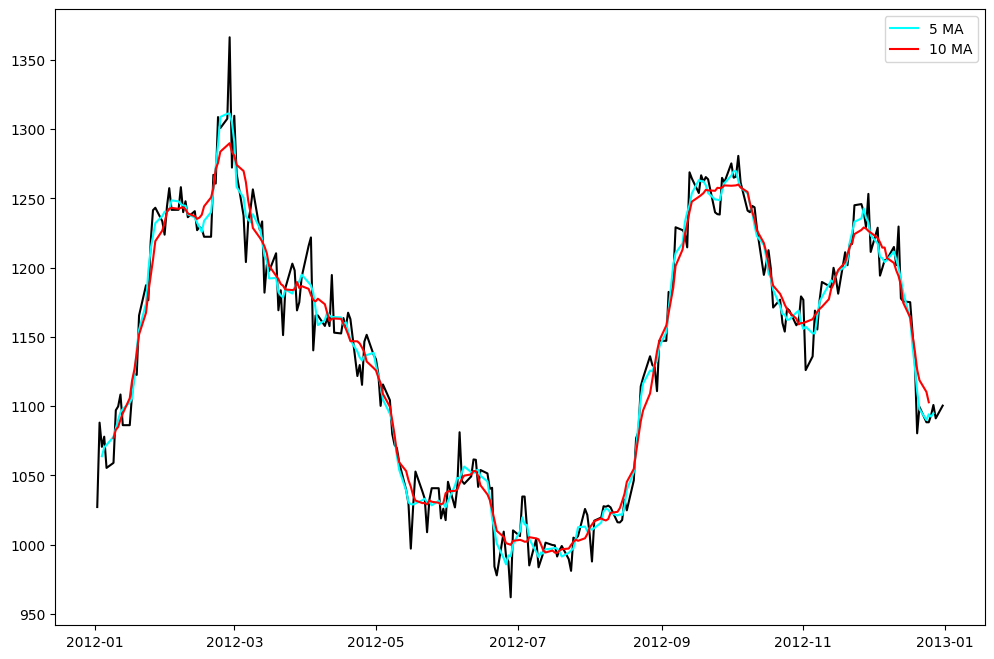

In [40]:
plt.figure(figsize=(12,8))
plt.plot(df.loc['2012']['silver'],color = 'black')
plt.plot(df.loc['2012']['silver'].rolling(5,center = True).mean(),color = 'cyan',label = '5 MA')
plt.plot(df.loc['2012']['silver'].rolling(10,center = True).mean(),color = 'red',label = '10 MA')
plt.legend()
plt.show()

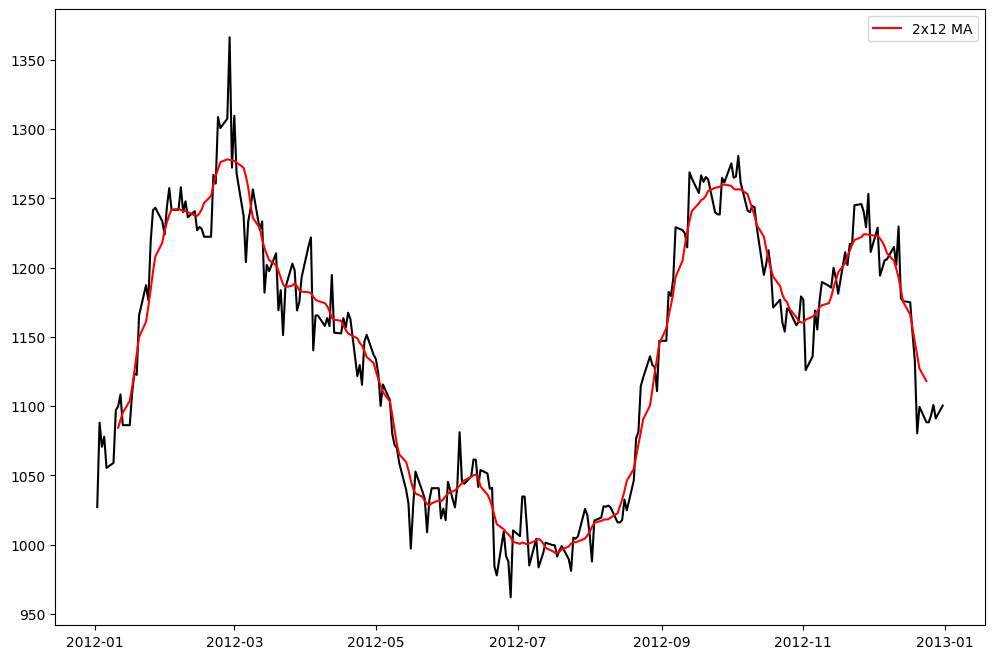

In [42]:
plt.figure(figsize=(12,8))
plt.plot(df.loc['2012']['silver'],color = 'black')
plt.plot(df.loc['2012']['silver'].rolling(12,center = True).mean().rolling(2,center = True).mean(),color = 'red',label = '2x12 MA')
plt.legend()
plt.show()

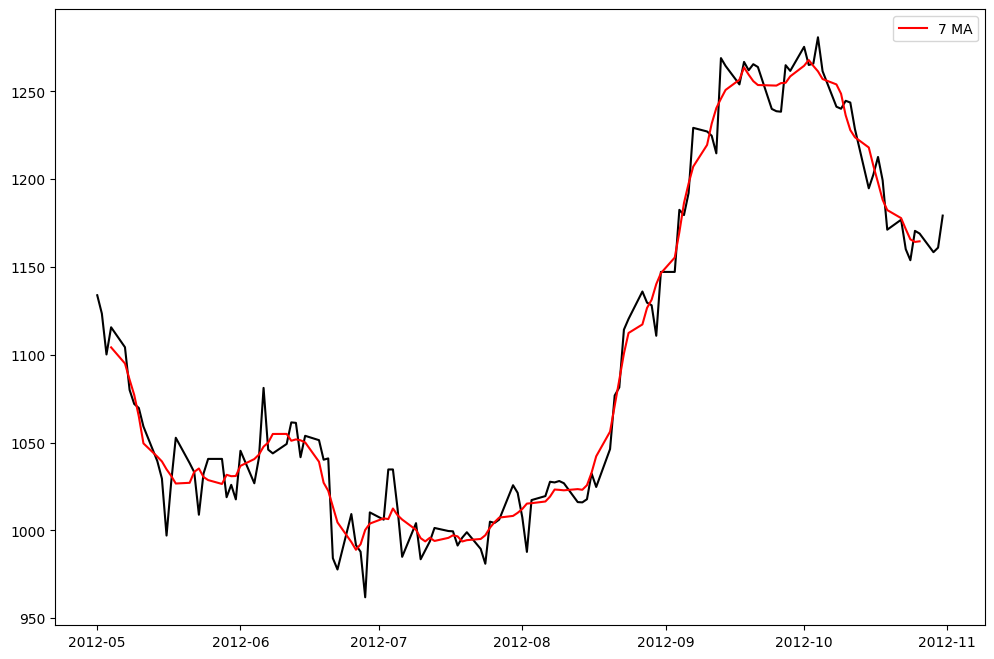

In [45]:
plt.figure(figsize=(12,8))
plt.plot(df.loc['2012-05':'2012-10']['silver'],color = 'black')
plt.plot(df.loc['2012-05':'2012-10']['silver'].rolling(7,center = True).mean(),color = 'red',label = '7 MA')
plt.legend()
plt.show()

### 3.4.- Classical decomposition

Additive decomposition

**Step 1**
If $m$ is an even number, compute the trend-cycle component $\hat{T}_{t}$ using a $2\times m$-MA. If $m$ is an odd number, compute the trend-cycle component $\hat{T}_{t}$ using a $m$-MA.

**Step 2**
Calculate the detrended series:  $y - \hat{T}_{t}$.

**Step 3**
To estimate the seasonal component for each season, simply average the detrended values for that season. For example, with monthly data, the seasonal component for March is the average of all the detrended March values in the data. These seasonal component values are then adjusted to ensure that they add to zero. The seasonal component is obtained by stringing together these monthly values, and then replicating the sequence for each year of data. This gives $\hat{S}_{t}$.

**Step 4**
The remainder component is calculated by subtracting the estimated seasonal and trend-cycle components: $\hat{R}_{s} = y_{t} - \hat{T}_{t} - \hat{S}_{t}$.

In [21]:
import statsmodels.api as sm
#from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#Datasets: https://github.com/vincentarelbundock/Rdatasets/blob/master/datasets.csv

#df = sm.datasets.get_rdataset('nottem','datasets').data
df = sm.datasets.get_rdataset('co2','datasets').data
#df.index = pd.to_datetime(df.index)

df['time']=pd.date_range(start = '1959',end = '1998',freq='1M')
df.set_index('time',inplace = True)

In [75]:
series = df
trend = series.rolling(12,center = True).mean().rolling(2,center = True).mean()
detrend = series - trend
seasonal = np.nanmean(np.squeeze(detrend.values).reshape(int(len(detrend)/12),12),axis = 0)
seasonal = np.concatenate([seasonal]*(1997-1959+1))
remainder = np.squeeze(series) - np.squeeze(trend) - seasonal

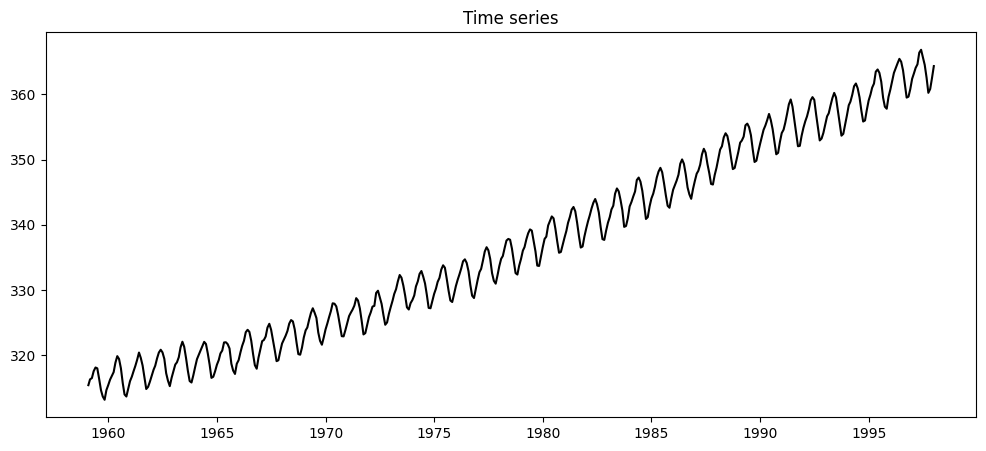

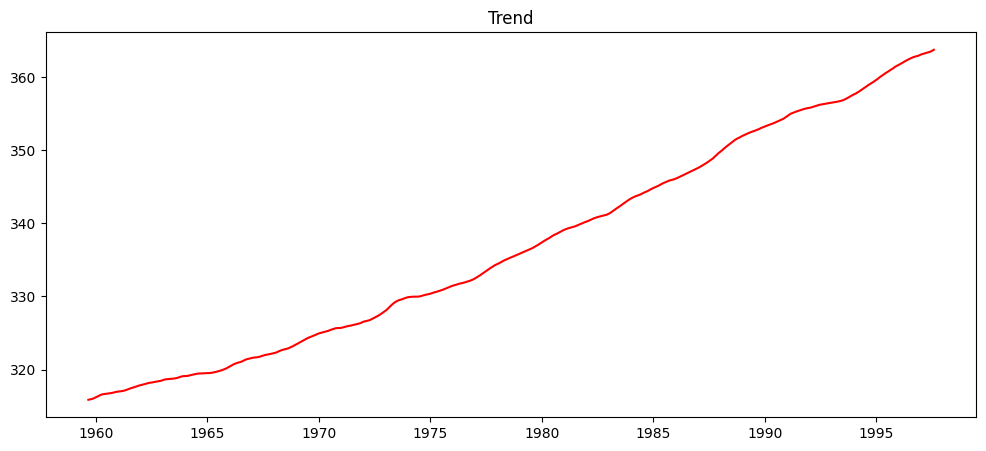

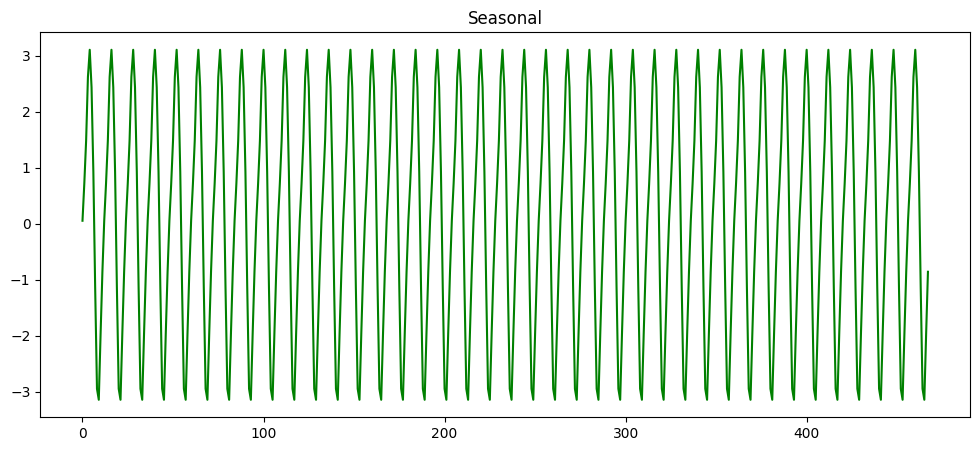

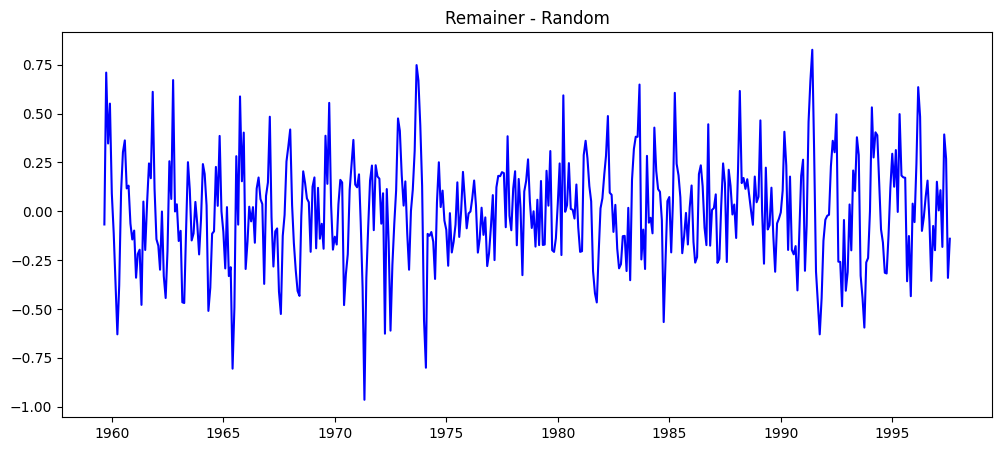

In [77]:
plt.figure(figsize=(12,5))
plt.plot(series,color = 'black')
plt.title('Time series')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(trend,color = 'red')
plt.title('Trend')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(seasonal,color = 'green')
plt.title('Seasonal')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(remainder,color = 'blue')
plt.title('Remainer - Random')
plt.show()

### 3.6.- STL decomposition

In [ ]:
import statsmodels.api as sm
#from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import STL
#Datasets: https://github.com/vincentarelbundock/Rdatasets/blob/master/datasets.csv

#df = sm.datasets.get_rdataset('nottem','datasets').data
df = sm.datasets.get_rdataset('co2','datasets').data
#df.index = pd.to_datetime(df.index)

df['time']=pd.date_range(start = '1959',end = '1998',freq='1M')
df.set_index('time',inplace = True)

series = df
trend = series.rolling(12,center = True).mean().rolling(2,center = True).mean()
detrend = series - trend
seasonal = np.nanmean(np.squeeze(detrend.values).reshape(int(len(detrend)/12),12),axis = 0)
seasonal = np.concatenate([seasonal]*(1997-1959+1))
remainder = np.squeeze(series) - np.squeeze(trend) - seasonal

In [93]:
stl = STL(series, seasonal=13)
res = stl.fit()
trend_stl = res.trend
seasonal_stl = res.seasonal
resid_stl = res.resid

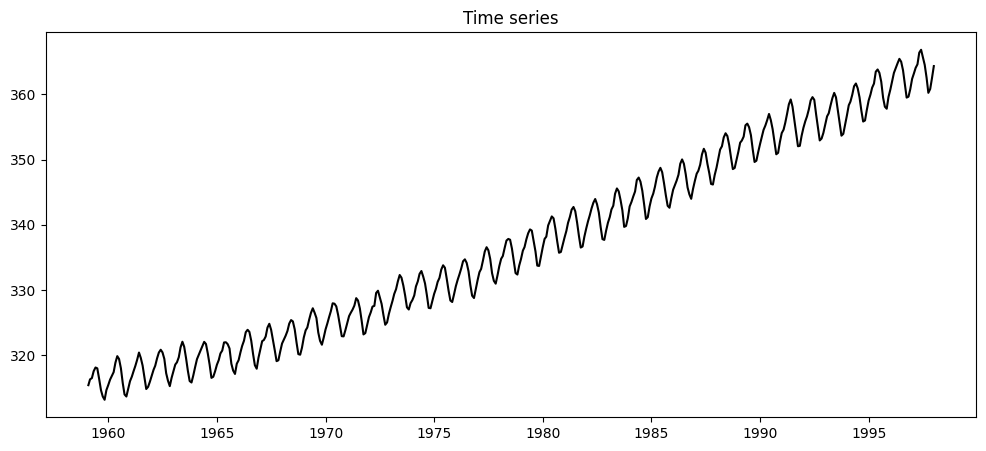

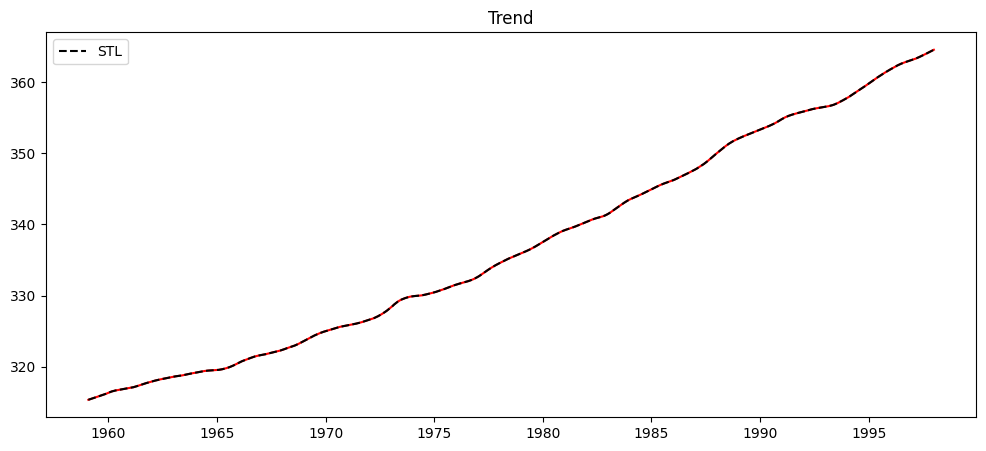

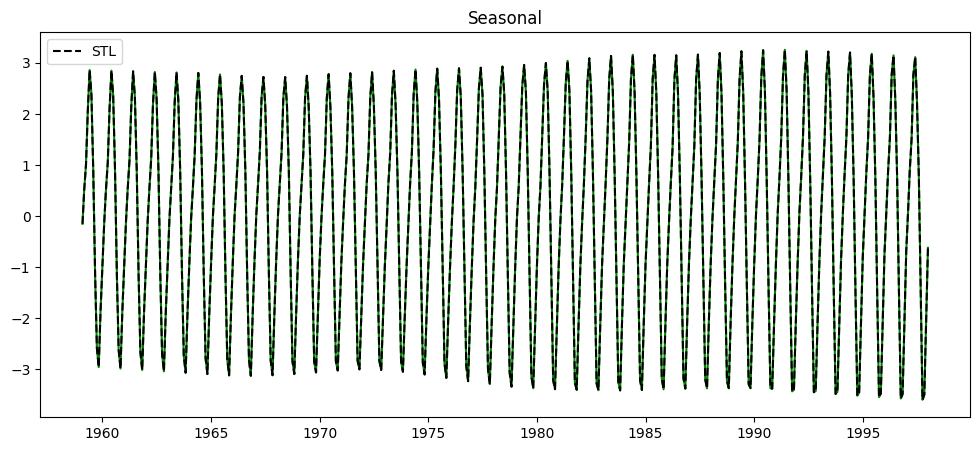

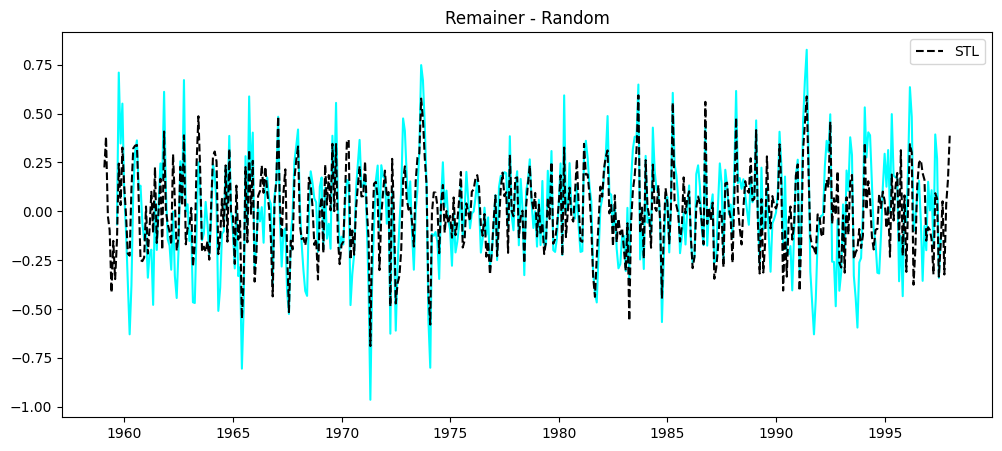

In [99]:
plt.figure(figsize=(12,5))
plt.plot(series,color = 'black')
plt.title('Time series')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(trend,color = 'red')
plt.plot(trend_stl,color = 'black', linestyle = '--',label = 'STL')
plt.title('Trend')
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.plot(seasonal,color = 'green')
plt.plot(seasonal_stl,color = 'black', linestyle = '--',label = 'STL')
plt.title('Seasonal')
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.plot(remainder,color = 'cyan')
plt.plot(resid_stl,color = 'black', linestyle = '--',label = 'STL')
plt.title('Remainer - Random')
plt.legend()
plt.show()

## 4.- Time series features

In [109]:
import statsmodels.api as sm
#from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sn

#Datasets: https://github.com/vincentarelbundock/Rdatasets/blob/master/datasets.csv

#df = sm.datasets.get_rdataset('nottem','datasets').data
df = sm.datasets.get_rdataset('CollegeDistance','AER').data
#df.index = pd.to_datetime(df.index)

In [102]:
df.describe()

,score,unemp,wage,distance,tuition,education
count,4739.000000,4739.000000,4739.000000,4739.000000,4739.000000,4739.000000
mean,50.889029,7.597215,9.500506,1.802870,0.814608,13.807765
std,8.701910,2.763581,1.343067,2.297128,0.339504,1.789107
min,28.950001,1.400000,6.590000,0.000000,0.257510,12.000000
25%,43.924999,5.900000,8.850000,0.400000,0.484990,12.000000
50%,51.189999,7.100000,9.680000,1.000000,0.824480,13.000000
75%,57.769999,8.900000,10.150000,2.500000,1.127020,16.000000
max,72.809998,24.900000,12.960000,20.000000,1.404160,18.000000


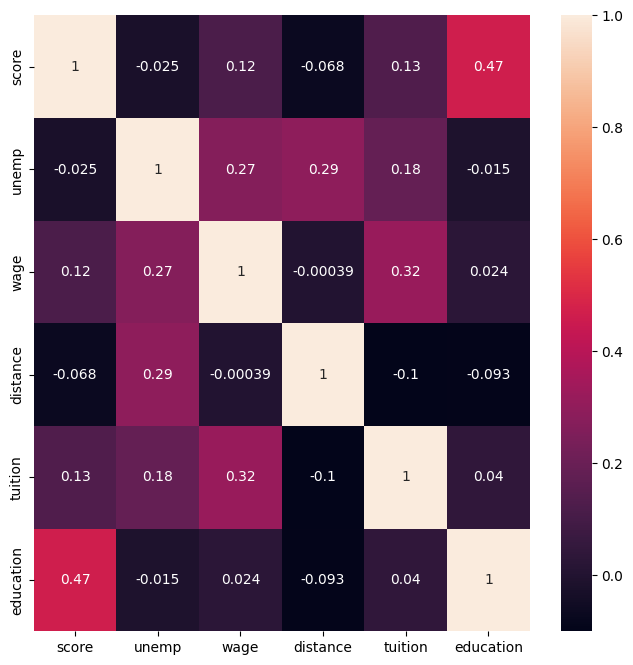

In [110]:
corr_matrix = df[['score','unemp','wage','distance','tuition','education']].corr()

plt.figure(figsize=(8,8))
sn.heatmap(corr_matrix, annot=True)
plt.show()

## 5.- The forcaster's toolbox

### 5.1.- A tidy forecasting workflow

* **Data preparation (tidy):** The first step in forecasting is to prepare data in the correct format. This process may involve loading in data, identifying missing values, filtering the time series, and other pre-processing tasks.
* **Plot the data (visualise):** As we have seen in Chapter 2, visualisation is an essential step in understanding the data. Looking at your data allows you to identify common patterns, and subsequently specify an appropriate model.
* **Define a model (specify):** Specifying an appropriate model for the data is essential for producing appropriate forecasts.
* **Train the model (estimate):** Once an appropriate model is specified, we next train the model on some data.
* **Check model performance (evaluate):** Once a model has been fitted, it is important to check how well it has performed on the data. There are several diagnostic tools available to check model behaviour, and also accuracy measures that allow one model to be compared against another.
* **Produce forecasts (forcast):** With an appropriate model specified, estimated and checked, it is time to produce the forecasts using forecast(). The easiest way to use this function is by specifying the number of future observations to forecast. In other situations, it may be more convenient to provide a dataset of future time periods to forecast. This is commonly required when your model uses additional information from the data, such as exogenous regressors. Additional data required by the model can be included in the dataset of observations to forecast.

### 5.2.- Some simple forecasting methods

* **Mean method**

Here, the forecasts of all future values are equal to the average (or “mean”) of the historical data. If we let the historical data be denoted by  $y_{1},...,y_{T}$, then we can write the forecasts as

$
\hat{y}_{T+h|T} = \bar{y} = \frac{1}{T}\Sigma_{t=1}^{T}y_{t}.
$

The notation $\hat{y}_{T+h|T}$ is a short-hand for the estimate of $y_{T+h}$ based on the data $y_{1},...,y_{T}$.

* **Naîve method**

For naïve forecasts, we simply set all forecasts to be the value of the last observation. That is,

$
\hat{y}_{T+h|T} = y_{T}.
$
 
This method works remarkably well for many economic and financial time series.

* **Seasonal naîve method**

A similar method is useful for highly seasonal data. In this case, we set each forecast to be equal to the last observed value from the same season (e.g., the same month of the previous year). Formally, the forecast for time  $T+h$ is written as

$
\hat{y}_{T+h|T} = y_{T+h-m(k+1)},
$
 
where $m=$ the seasonal period, and $k$ is the integer part of $(h-1)/m$ (i.e., the number of complete years in the forecast period prior to time $T+h$). This looks more complicated than it really is. For example, with monthly data, the forecast for all future February values is equal to the last observed February value. With quarterly data, the forecast of all future Q2 values is equal to the last observed Q2 value (where Q2 means the second quarter). Similar rules apply for other months and quarters, and for other seasonal periods.

* **Drift method**

A variation on the naïve method is to allow the forecasts to increase or decrease over time, where the amount of change over time (called the drift) is set to be the average change seen in the historical data. Thus the forecast for time $T+h$ is given by

$
\hat{y}_{T+h|T} = y_{T} + \frac{h}{T-1}\Sigma_{t=2}^{T}(y_{t}-y_{t-1}) = y_{T} + h\left(\frac{y_{T}-y_{1}}{T-1}\right).
$

This is equivalent to drawing a line between the first and last observations, and extrapolating it into the future.


In [25]:
import statsmodels.api as sm
#from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

#Datasets: https://github.com/vincentarelbundock/Rdatasets/blob/master/datasets.csv

df = sm.datasets.get_rdataset('GoldSilver','AER').data
df.index = pd.to_datetime(df.index)
df_ = df['gold'].loc['2011':'2011-10'].values

In [111]:
h = 15

forecast_mean = [np.mean(df_)]*h

forecast_naive = [df_[-1]]*h

m = 30
forecast_seasonalnaive = [df_[i-m + m*int(np.floor((i-1)/m))] for i in range(1,h+1)]

forecast_drift = [df_[-1]+i*(df_[-1] - df_[0])/(len(df_)-1) for i in range(1,h+1)]

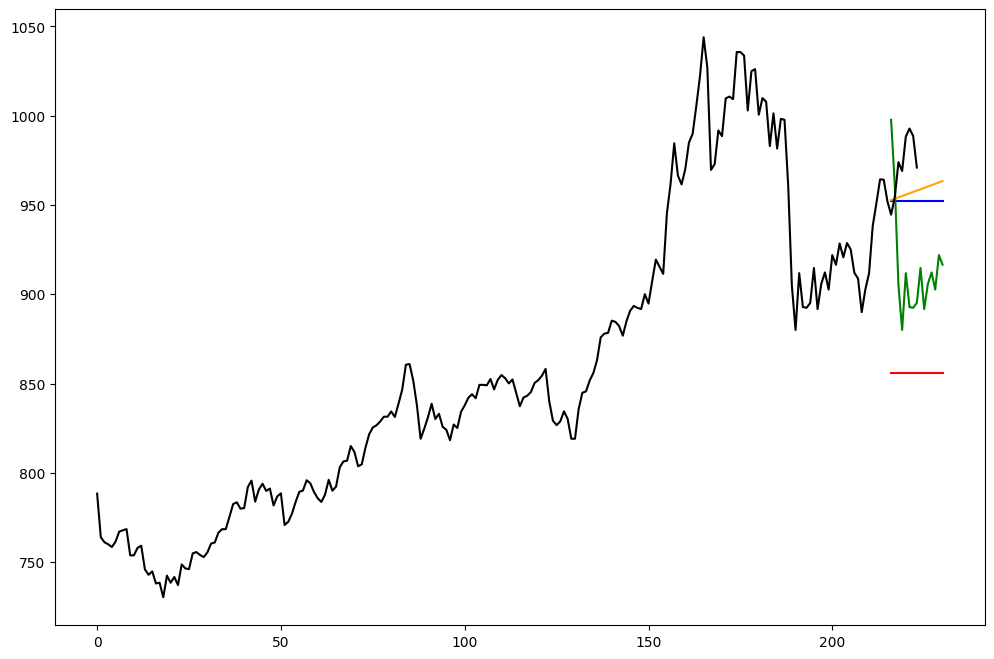

In [112]:
fig = plt.figure(figsize = (12,8))

range(len(df_),len(df_)+10)
plt.plot(range(len(df_),len(df_)+h),np.array(forecast_mean),color = 'red')
plt.plot(range(len(df_),len(df_)+h),np.array(forecast_naive),color = 'blue')
plt.plot(range(len(df_),len(df_)+h),np.array(forecast_seasonalnaive),color = 'green')
plt.plot(range(len(df_),len(df_)+h),np.array(forecast_drift),color = 'orange')
#plt.plot(np.concatenate((df_,np.array(forecast_mean))),color = 'green')
#plt.plot(np.concatenate((df_,np.array(forecast_naive))),color = 'red')
#plt.plot(np.concatenate((df_,np.array(forecast_seasonalnaive))),color = 'blue')
#plt.plot(np.concatenate((df_,np.array(forecast_drift))),color = 'orange')

plt.plot(df['gold'].loc['2011':'2011-11-10'].values,color = 'black')

### 5.5 Distributional forecast and prediction intervals

**Forecast distributions** 

[...]  we express the uncertainty in our forecasts using a probability distribution. It describes the probability of observing possible future values using the fitted model. The point forecast is the mean of this distribution. Most time series models produce normally distributed forecasts — that is, we assume that the distribution of possible future values follows a normal distribution. We will look at a couple of alternatives to normal distributions later in this section.

**Prediction intervals**

A prediction interval gives an interval within which we expect $y_{t}$ to lie with a specified probability. For example, assuming that distribution of future observations is normal, a 95% prediction interval for the  $h$-step forecast is

$
y_{T+h|Y}\pm 1.96\hat{\sigma}_{h},
$
where $\hat{\sigma}_{h}$ is an estimate of the standard deviation of the  
$h$-step forecast distribution.

More generally, a prediction interval can be written as

$
y_{T+h|Y}\pm c\hat{\sigma}_{h},
$
 
where the multiplier $c$ depends on the coverage probability.

| Percentage   |      Multiplier      |
|----------|:-------------:|
| 99 | 2.58  |
| 98 | 2.33  |
| 97 | 2.17  |
| 96 | 2.05  |
| 95 | 1.96  |
| 90 | 1.64  |
| 85 | 1.44  |
| 80 | 1.28  |
| 75 | 1.15  |
| 70 | 1.04  |

**One-step prediciton intervals**

When forecasting one step ahead, the standard deviation of the forecast distribution can be estimated using the standard deviation of the residuals given by

$
\hat{\sigma} = \sqrt{\frac{1}{T-K-M}\Sigma_{y = 1}^{T}e_{t}^{2}}
$

where $K$ is the number of parameters estimated in the forecasting method, and $M$ is the number of missing values in the residuals. (For example, $M = 1$ for a naive forecast, because we can’t forecast the first observation.)

**Multi-step prediciton intervals**

A common feature of prediction intervals is that they usually increase in length as the forecast horizon increases. The further ahead we forecast, the more uncertainty is associated with the forecast, and thus the wider the prediction intervals. That is, $\sigma_{h}$ usually increases with $h$ (although there are some non-linear forecasting methods which do not have this property).

[...] For multi-step forecasts, a more complicated method of calculation is required. These calculations assume that the residuals are uncorrelated.

**Benchmark methods**

For the four benchmark methods, it is possible to mathematically derive the forecast standard deviation under the assumption of uncorrelated residuals

| Benchmark method   |      $h$-step forecast standard deviation      |
|----------|:-------------:|
| Mean | $\hat{\sigma}_{h} = \hat{\sigma}\sqrt{1+1/T}$  |
| Naive | $\hat{\sigma}_{h} = \hat{\sigma}\sqrt{h}$  |
| Seasonal naive | $\hat{\sigma}_{h} = \hat{\sigma}\sqrt{k+1}$  |
| Drift | $\hat{\sigma}_{h} = \hat{\sigma}\sqrt{h(1+h/(T-1))}$  |


**Prediction intervals from bootstrapped residuals**

When a normal distribution for the residuals is an unreasonable assumption, one alternative is to use bootstrapping, which only assumes that the residuals are uncorrelated with constant variance. We will illustrate the procedure using a naïve forecasting method.

A one-step forecast error is defined as $e_{t}=y_{t}-\hat{y}_{t|t-1}$. For a naïve forecasting method, $\hat{y}_{t|t-1} = t_{t-1}$ , so we can rewrite this as

$
y_{t} = y_{t-1} + e_{t}
$

Assuming future errors will be similar to past errors, when $t>T$ we can replace $e_{t}$ by sampling from the collection of errors we have seen in the past (i.e., the residuals). So we can simulate the next observation of a time series using

$
y^{*}_{T+1} = y_{T} + e_{T+1}^{*}
$

where $e_{T+1}^{*}$ is a randomly sampled error from the past, and $y^{*}_{T+1}$ is the possible future value that would arise if that particular error value occurred. We use a * to indicate that this is not the observed $y_{T+1}$ value, but one possible future that could occur.

In [1]:
import statsmodels.api as sm
#from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

#Datasets: https://github.com/vincentarelbundock/Rdatasets/blob/master/datasets.csv

df = sm.datasets.get_rdataset('GoldSilver','AER').data
df.index = pd.to_datetime(df.index)
df_ = df['gold'].loc['2011':'2011-10'].values

In [2]:
def forecast_bootstrap_naive(y,h):
    e_star = y[1::]-y[:-1]
    forecast = []
    for _ in range(h):
        e_star_tp1 = e_star[np.random.randint(0, len(e_star)-1)]
        if _ == 0:
            forecast.append(y[-1] + e_star_tp1)
        else:
            forecast.append(forecast[-1] + e_star_tp1)
    return forecast

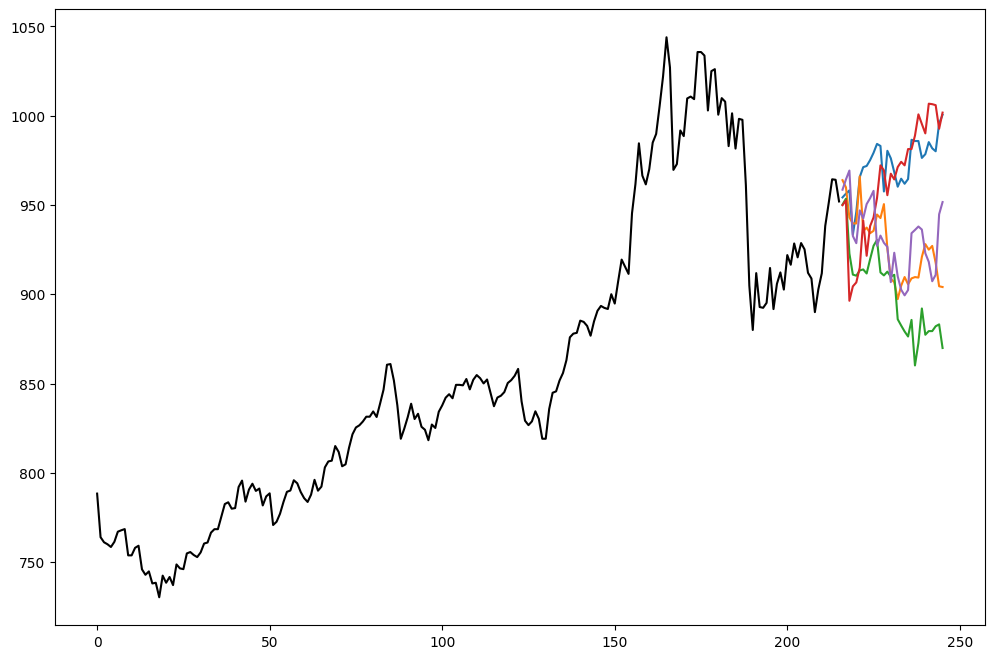

In [3]:
h = 30

fig = plt.figure(figsize = (12,8))
for _ in range(5):
    plt.plot(range(len(df_),len(df_)+h),np.array(forecast_bootstrap_naive(df_,h)))


plt.plot(df_,color = 'black')

In [4]:
bootstrap = []
for _ in range(10000):
    bootstrap.append(np.array(forecast_bootstrap_naive(df_,h)))
bootstrap = np.array(bootstrap)

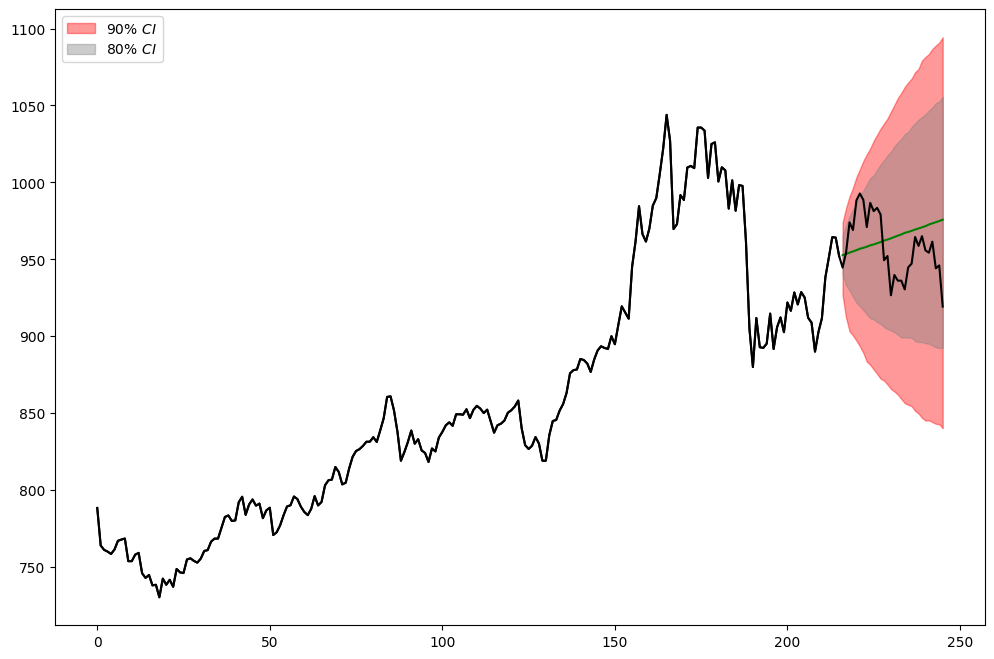

In [9]:
mean_of_forecast = np.mean(bootstrap,axis = 0)
p95_of_forecast = np.percentile(bootstrap,97.5,axis = 0)
p05_of_forecast = np.percentile(bootstrap,2.5,axis = 0)
p80_of_forecast = np.percentile(bootstrap,90,axis = 0)
p20_of_forecast = np.percentile(bootstrap,10,axis = 0)

fig = plt.figure(figsize = (12,8))

plt.plot(range(len(df_),len(df_)+h),mean_of_forecast,color = 'green')
plt.fill_between(range(len(df_),len(df_)+h),p05_of_forecast,p95_of_forecast, color = 'red',alpha = 0.4,label = r'$90\%\ CI$')
plt.fill_between(range(len(df_),len(df_)+h),p80_of_forecast,p20_of_forecast, color = 'grey',alpha = 0.4,label = r'$80\%\ CI$')

plt.plot(df['gold'].loc['2011':'2011-12-12'].values,color = 'black')
plt.plot(df_,color = 'black')
plt.legend(loc = 2)

### 5.7.- Forecasting with decomposition

Time series decomposition (discussed in Chapter 3) can be a useful step in producing forecasts.

Assuming an additive decomposition, the decomposed time series can be written as

$
y_{t} = \hat{S}_{t} + \hat{A}_{t},
$

where $\hat{A}_{t} = \hat{S}_{t} + \hat{R}_{t}$ is the seasonally adjusted component. Or, if a multiplicative decomposition has been used, we can write

$
y_{t} = \hat{S}_{t}\cdot\hat{A}_{t},
$

where  $\hat{A}_{t} = \hat{S}_{t}\cdot\hat{R}_{t}$.

To forecast a decomposed time series, we forecast the seasonal component, $\hat{S}_{t}$, and the seasonally adjusted component $\hat{A}_{t}$ , separately. It is usually assumed that the seasonal component is unchanging, or changing extremely slowly, so it is forecast by simply taking the last year of the estimated component. In other words, a seasonal naïve method is used for the seasonal component.

To forecast the seasonally adjusted component, any non-seasonal forecasting method may be used. 

### 5.8.- Evaluating point forecast accuracy

* **Forecast errors**

A forecast “error” is the difference between an observed value and its forecast. Here “error” does not mean a mistake, it means the unpredictable part of an observation. It can be written as

$
e_{T+h} = y_{T+h} - \hat{y}_{T+H|T},
$
 
where the training data is given by  $\lbrace y_{1},...,y_{T} \rbrace$ and the test data is given by $\lbrace y_{T+1},y_{T+2},... \rbrace$.

Note that forecast errors are different from residuals in two ways. First, residuals are calculated on the training set while forecast errors are calculated on the test set. Second, residuals are based on one-step forecasts while forecast errors can involve multi-step forecasts.



## 7.- Time series regression models 

In [1]:
import statsmodels.api as sm
#from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import acf
import statsmodels.api as sm
#Datasets: https://github.com/vincentarelbundock/Rdatasets/blob/master/datasets.csv

df = sm.datasets.get_rdataset('EuStockMarkets','datasets').data
#df.set_index(df['year'],inplace = True)
#df.index = pd.to_datetime(df.index)
df.describe()

,DAX,SMI,CAC,FTSE
count,1860.000000,1860.000000,1860.000000,1860.000000
mean,2530.656882,3376.223710,2227.828495,3565.643172
std,1084.792740,1663.026465,580.314198,976.715540
min,1402.340000,1587.400000,1611.000000,2281.000000
25%,1744.102500,2165.625000,1875.150000,2843.150000
50%,2140.565000,2796.350000,1992.300000,3246.600000
75%,2722.367500,3812.425000,2274.350000,3993.575000
max,6186.090000,8412.000000,4388.500000,6179.000000


In [2]:
rows_to_remove = df.sample(n = 32).index
df = df.drop(rows_to_remove)

df['Timestamp'] = pd.bdate_range(start= '1991', end = '1998')

df.set_index(df['Timestamp'],inplace = True)
df.drop(columns = 'Timestamp',inplace = True)

<Axes: xlabel='Timestamp'>

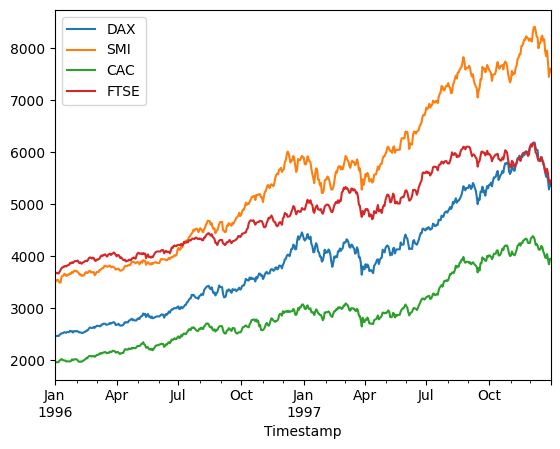

In [3]:
df.loc['1996':'1997'].plot()

### 7.1.- The linear model

In [4]:
#X = df.loc['1996']['FTSE']
X = df.loc['1996'][['FTSE','CAC']]
y = df.loc['1996']['SMI']

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

In [22]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1898.
Date:                Wed, 07 Feb 2024   Prob (F-statistic):          2.01e-133
Time:                        14:06:00   Log-Likelihood:                -1355.8
No. Observations:                 209   AIC:                             2718.
Df Residuals:                     206   BIC:                             2728.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4149.6767    240.409    -17.261      0.0

In [25]:
print("Parameters: ", results.params)
print("R2: ", results.rsquared)
y_hat = results.predict(X_train)

Parameters:  [-4.14967671e+03  1.72307868e+00  5.04978158e-01]
R2:  0.9485155220331445


In [26]:
residuals = y_train-y_hat
auto_corr =acf(residuals,nlags = 30)

### 7.3.- Evaluating the regression model

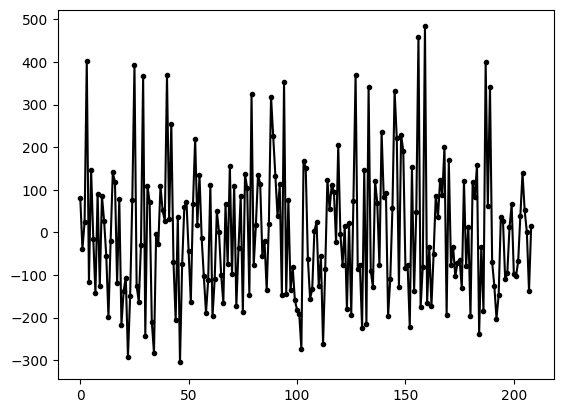

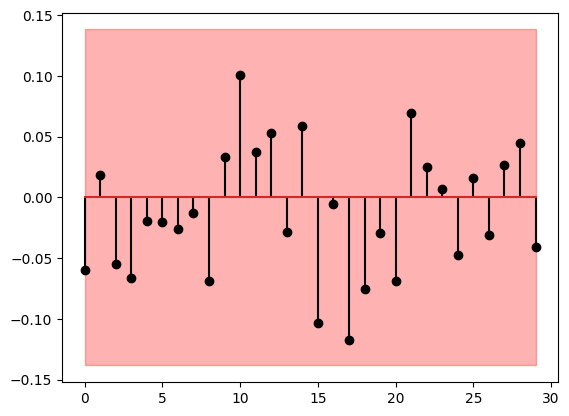

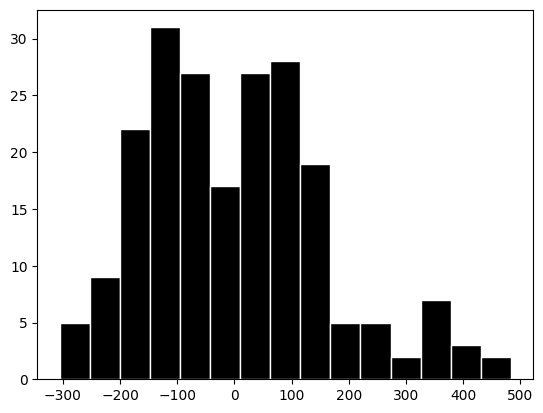

In [28]:
plt.figure()
plt.plot(residuals,'.-',color = 'black')

plt.figure()
plt.stem(auto_corr[1:],'.-k')
plt.fill_between(range(0,30),-2/np.sqrt(len(residuals)),2/np.sqrt(len(residuals)),color = 'red',alpha = 0.3,label = 'white noise')

plt.figure()
plt.hist(residuals,bins = 15,color = 'black',edgecolor = 'white');

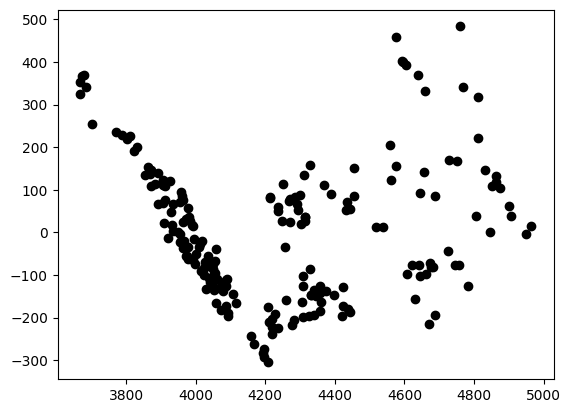

In [29]:
plt.scatter(X_train[:,1],residuals,color = 'black')

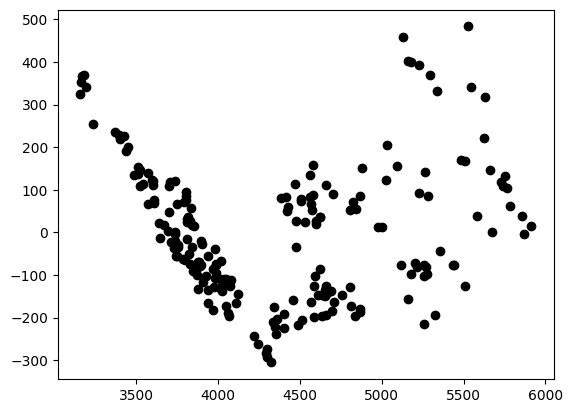

In [30]:
plt.scatter(y_hat,residuals,color = 'black')

### 7.4.- Some useful predictors

#### Dummy variables

In [32]:
import statsmodels.api as sm
#from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import acf
from sklearn.metrics import mean_absolute_error, r2_score
#Datasets: https://github.com/vincentarelbundock/Rdatasets/blob/master/datasets.csv

df = sm.datasets.get_rdataset('co2','datasets').data

df['time']=pd.date_range(start = '1959',end = '1998',freq='1M')
df.set_index('time',inplace = True)

In [33]:
d = [(df.index.month == i)*1 for i in range(2,13)]
df_d = pd.DataFrame(np.array(d).transpose())
df_d.set_index(df.index,inplace = True)

df_t = pd.DataFrame(np.array([i for i in range(len(df))]))
df_t.set_index(df.index,inplace = True)

X = pd.concat([df_t,df_d],axis = 1)
y = df['value']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

#reg = LinearRegression().fit(X_train, y_train)
#print(reg.score(X_train, y_train))
#print('Coefs:',reg.coef_)
#print('Intercept:',reg.intercept_)

#y_hat = reg.predict(X_train)

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

y_hat = results.predict(X_train)

residuals = y_train-y_hat
auto_corr =acf(residuals,nlags = 30)
print('')
#print('MAE:', mean_absolute_error(y_test,reg.predict(X_test)))
print('MAE:', mean_absolute_error(y_test,results.predict(sm.add_constant(X_test))))
#print('R2:', r2_score(y_train,reg.predict(X_train)))
print('R2:', r2_score(y_train,results.predict(X_train)))
T = len(y_train)
k = 12
#print('R2-adjusted:', 1 - (1-r2_score(y_train,reg.predict(X_train))**2)*((T-1)/(T-k-1)))
print('R2-adjusted:', 1 - (1-r2_score(y_train,results.predict(X_train))**2)*((T-1)/(T-k-1)))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     2471.
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:34:35   Log-Likelihood:                -705.67
No. Observations:                 374   AIC:                             1437.
Df Residuals:                     361   BIC:                             1488.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        311.6033      0.329    947.896      0.0

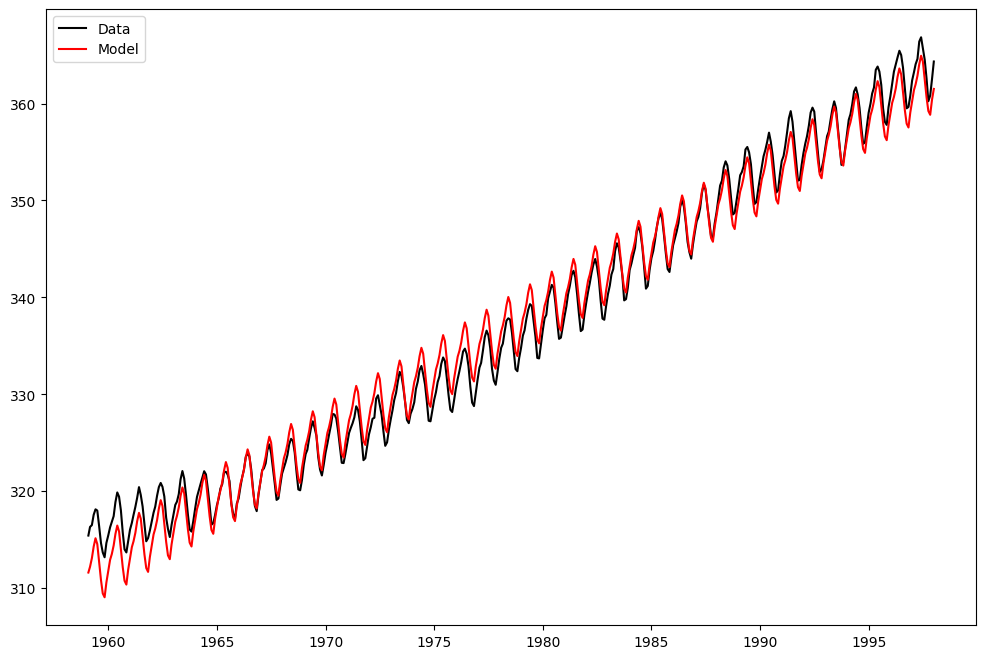

In [38]:
fig = plt.figure(figsize=(12,8))
plt.plot(df,label = 'Data', color = 'black')
#plt.plot(df.index,reg.predict(X), label = 'Model',color = 'red')
plt.plot(df.index,results.predict(sm.add_constant(X)), label = 'Model',color = 'red')
plt.legend()

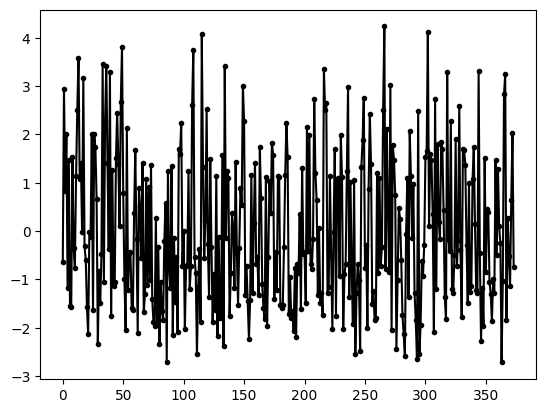

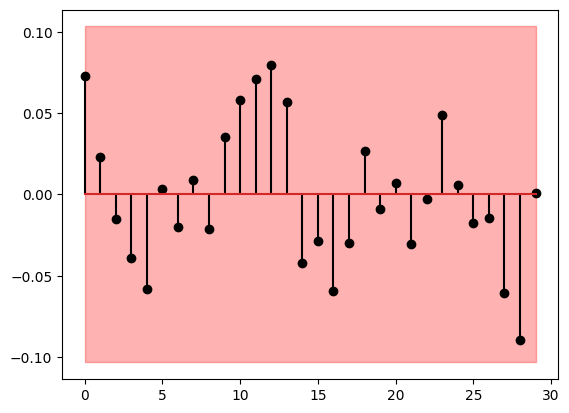

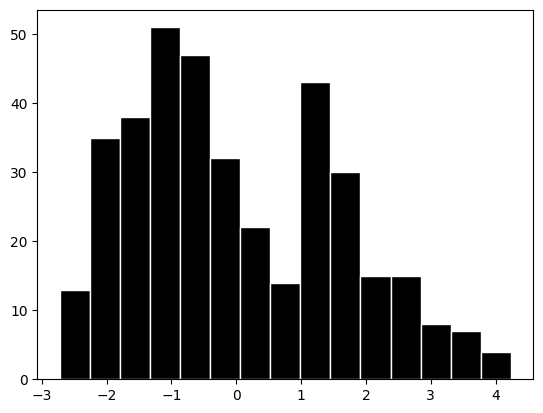

In [39]:
plt.figure()
plt.plot(residuals,'.-',color = 'black')

plt.figure()
plt.stem(auto_corr[1:],'.-k')
plt.fill_between(range(0,30),-2/np.sqrt(len(residuals)),2/np.sqrt(len(residuals)),color = 'red',alpha = 0.3,label = 'white noise')

plt.figure()
plt.hist(residuals,bins = 15,color = 'black',edgecolor = 'white');

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     7562.
Date:                Wed, 07 Feb 2024   Prob (F-statistic):          2.16e-301
Time:                        14:39:09   Log-Likelihood:                -834.39
No. Observations:                 374   AIC:                             1675.
Df Residuals:                     371   BIC:                             1687.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        313.9931      0.319    983.200      0.0

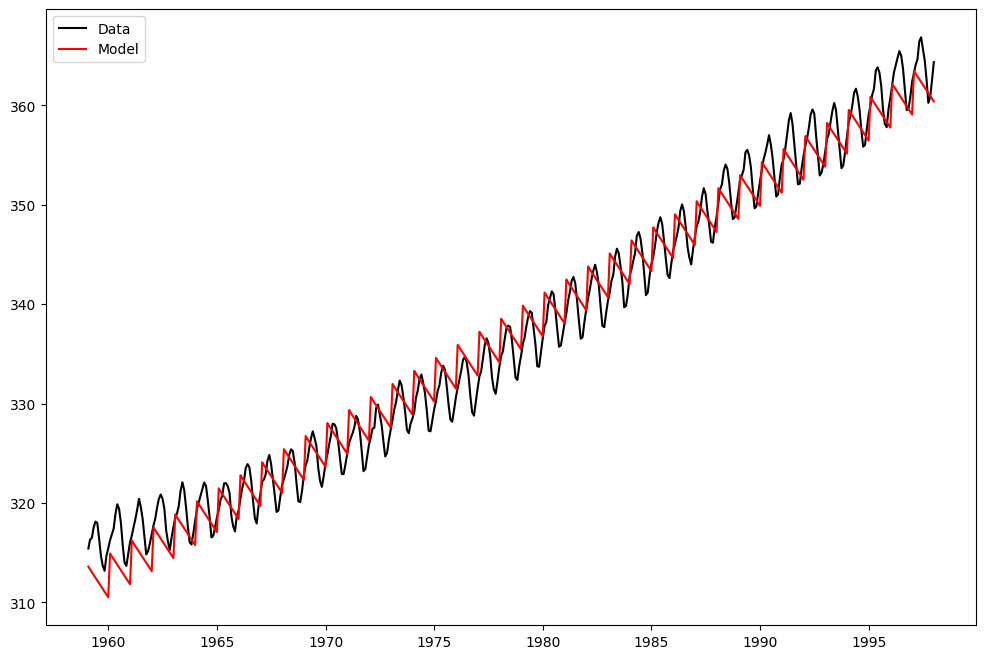

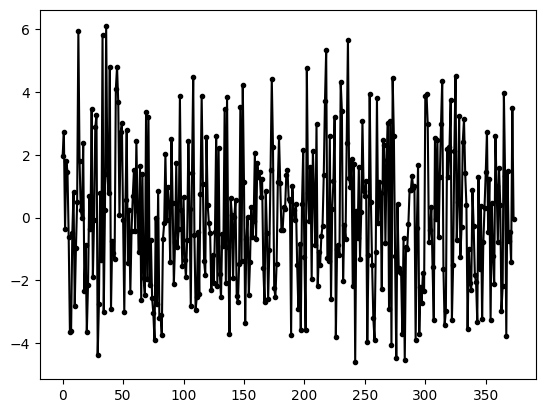

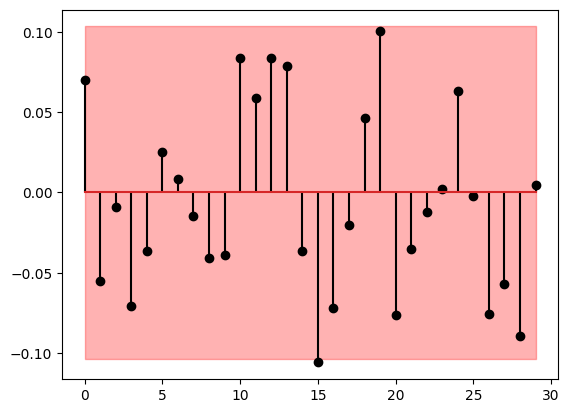

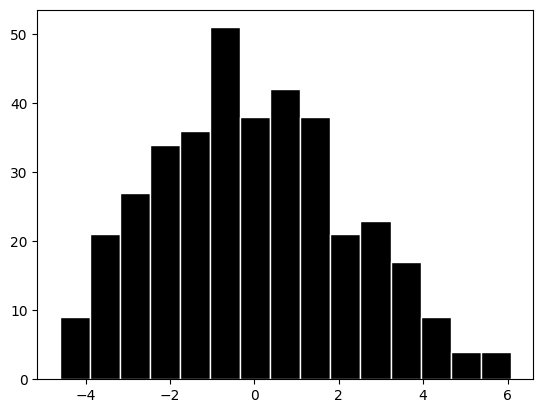

In [40]:
d1 = df.index.month
df_d1 = pd.DataFrame(np.array(d1).transpose())
df_d1.set_index(df.index,inplace = True)

X = pd.concat([df_t,df_d1],axis = 1)
y = df['value']

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

#reg = LinearRegression().fit(X_train, y_train)
#print(reg.score(X_train, y_train))
#print(reg.coef_)
#print(reg.intercept_)

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

y_hat = results.predict(X_train)

#y_hat = reg.predict(X_train)

residuals = y_train-y_hat
auto_corr =acf(residuals,nlags = 30)

print('')
#print('MAE:', mean_absolute_error(y_test,reg.predict(X_test)))
#print('R2:', r2_score(y_train,reg.predict(X_train)))
#T = len(y_train)
#k = 2
#print('R2-adjusted:', 1 - (1-r2_score(y_train,reg.predict(X_train))**2)*((T-1)/(T-k-1)))

fig = plt.figure(figsize=(12,8))
plt.plot(df,label = 'Data', color = 'black')
plt.plot(df.index,results.predict(sm.add_constant(X)), label = 'Model',color = 'red')
plt.legend()

plt.figure()
plt.plot(residuals,'.-',color = 'black')

plt.figure()
plt.stem(auto_corr[1:],'.-k')
plt.fill_between(range(0,30),-2/np.sqrt(len(residuals)),2/np.sqrt(len(residuals)),color = 'red',alpha = 0.3,label = 'white noise')

plt.figure()
plt.hist(residuals,bins = 15,color = 'black',edgecolor = 'white');

## 8.- Exponemtial smoothing

Exponential smoothing was proposed in the late 1950s (Brown, 1959; Holt, 1957; Winters, 1960), and has motivated some of the most successful forecasting methods. Forecasts produced using exponential smoothing methods are weighted averages of past observations, with the weights decaying exponentially as the observations get older. In other words, the more recent the observation the higher the associated weight. This framework generates reliable forecasts quickly and for a wide range of time series, which is a great advantage and of major importance to applications in industry.

### 8.1.- Simple exponential smoothing

In [52]:
import statsmodels.api as sm
#from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import acf
from sklearn.metrics import mean_absolute_error, r2_score

from statsmodels.tsa.exponential_smoothing.ets import ETSModel

#Datasets: https://github.com/vincentarelbundock/Rdatasets/blob/master/datasets.csv

df = sm.datasets.get_rdataset('oil','fpp2').data

#df['time']=pd.date_range(start = '1959',end = '1998',freq='1M')
df.set_index('time',inplace = True)
#df.drop(columns = 'time')

c:\Users\HP\Documents\Codes\Forecasting\venv_forecasting\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                 ETS Results                                  
Dep. Variable:                  value   No. Observations:                   49
Model:                       ETS(ANN)   Log Likelihood                -259.257
Date:                Wed, 07 Feb 2024   AIC                            524.514
Time:                        15:23:08   BIC                            530.189
Sample:                             0   HQIC                           526.667
                                 - 49   Scale                         2307.767
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.132      7.551      0.000       0.740       1.259
initial_level     110.7686     48.110      2.302      0.021      16.474     205.063
Ljung-Box (Q):                  

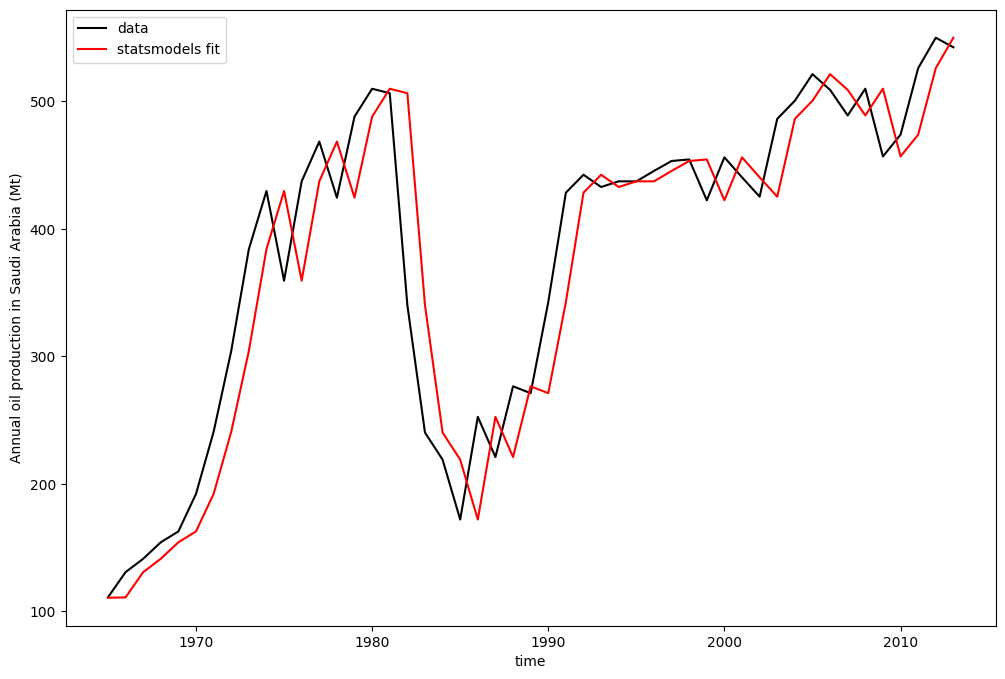

In [58]:
plt.figure(figsize = (12,8))

oil = df['value']

model = ETSModel(oil,
                error="add",
                trend = None,
                seasonal= None)
                #damped_trend=True,
                #seasonal_periods= )

fit = model.fit(maxiter=10000)

oil.plot(label="data",color = 'black')
fit.fittedvalues.plot(label="statsmodels fit",color = 'red')
plt.ylabel("Annual oil production in Saudi Arabia (Mt)")

# obtained from R
#params_R = [0.99989969, 0.11888177503085334, 0.80000197, 36.46466837, 34.72584983]
#yhat = model.smooth(params_R).fittedvalues
#yhat.plot(label="R fit", linestyle="--")

plt.legend()
print(fit.summary())

### 8.2.- Methods with trend

In [181]:
import statsmodels.api as sm
#from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import acf
from sklearn.metrics import mean_absolute_error, r2_score

from statsmodels.tsa.exponential_smoothing.ets import ETSModel

#Datasets: https://github.com/vincentarelbundock/Rdatasets/blob/master/datasets.csv
df = sm.datasets.get_rdataset('co2','datasets').data

df['time']=pd.date_range(start = '1959',end = '1998',freq='1M')
df.set_index('time',inplace = True)
#df = sm.datasets.get_rdataset('meteo','HSAUR').data
stl = STL(df, seasonal=13)
res = stl.fit()
trend_stl = res.trend
seasonal_stl = res.seasonal
resid_stl = res.resid

In [188]:
df_trend = pd.DataFrame(trend_stl)#df.rolling(window =12,center = False).mean()

In [176]:
#df_trend = df_trend[~np.isnan(df_trend.values)]

c:\Users\HP\Documents\Codes\Forecasting\venv_forecasting\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                 ETS Results                                  
Dep. Variable:                  trend   No. Observations:                   96
Model:                       ETS(AAN)   Log Likelihood                 338.547
Date:                Wed, 07 Feb 2024   AIC                           -667.093
Time:                        21:10:06   BIC                           -654.271
Sample:                    01-31-1990   HQIC                          -661.910
                         - 12-31-1997   Scale                            0.000
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.185      5.409      0.000       0.638       1.362
smoothing_trend     0.9998      0.124      8.084      0.000       0.757       1.242
initial_level     353.3276      

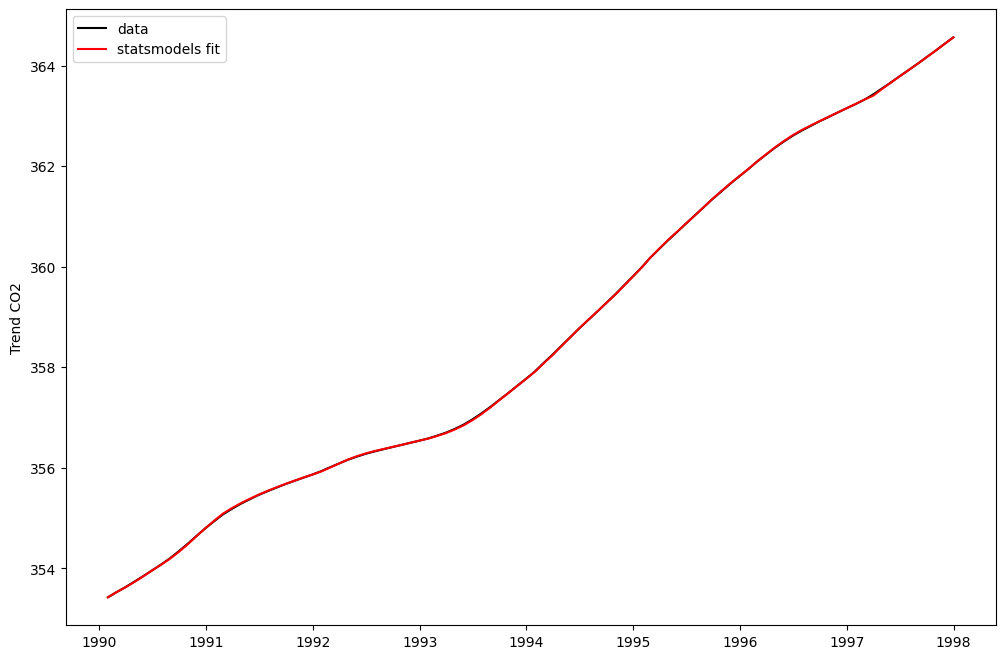

In [189]:
plt.figure(figsize = (12,8))

co2_trend = df_trend['trend'].loc['1990':]

model = ETSModel(co2_trend,
                error="add",
                trend = "add",
                seasonal= None,
                damped_trend=False)
                #seasonal_periods= )

fit = model.fit(maxiter=20000)

plt.plot(co2_trend,label="data",color = 'black')
plt.plot(fit.fittedvalues,label="statsmodels fit",color = 'red')
plt.ylabel("Trend CO2")

# obtained from R
#params_R = [0.99989969, 0.11888177503085334, 0.80000197, 36.46466837, 34.72584983]
#yhat = model.smooth(params_R).fittedvalues
#yhat.plot(label="R fit", linestyle="--")

plt.legend()
print(fit.summary())

c:\Users\HP\Documents\Codes\Forecasting\venv_forecasting\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                 ETS Results                                  
Dep. Variable:                  trend   No. Observations:                   96
Model:                      ETS(AAdN)   Log Likelihood                 332.470
Date:                Wed, 07 Feb 2024   AIC                           -652.941
Time:                        21:10:16   BIC                           -637.555
Sample:                    01-31-1990   HQIC                          -646.722
                         - 12-31-1997   Scale                            0.000
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.202      4.947      0.000       0.604       1.396
smoothing_trend     0.9998      0.125      8.003      0.000       0.755       1.245
damping_trend       0.9800      

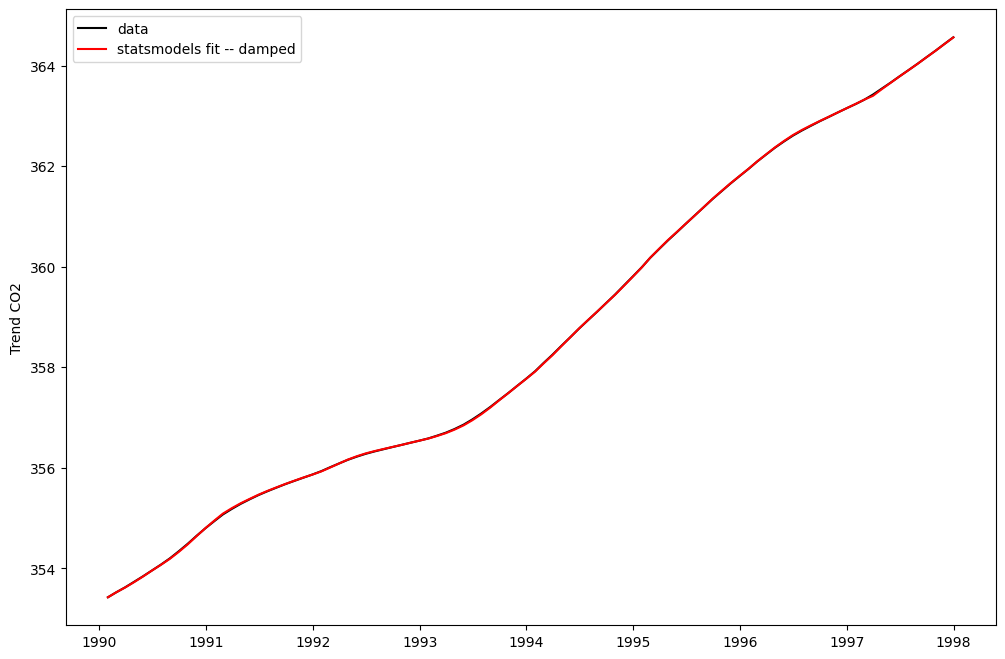

In [190]:
plt.figure(figsize = (12,8))

co2_trend = df_trend['trend'].loc['1990':]

model = ETSModel(co2_trend,
                error="add",
                trend = "add",
                seasonal= None,
                damped_trend=True)
                #seasonal_periods= )

fit_d = model.fit(maxiter=20000)

plt.plot(co2_trend,label="data",color = 'black')
plt.plot(fit.fittedvalues,label="statsmodels fit -- damped",color = 'red')
plt.ylabel("Trend CO2")

# obtained from R
#params_R = [0.99989969, 0.11888177503085334, 0.80000197, 36.46466837, 34.72584983]
#yhat = model.smooth(params_R).fittedvalues
#yhat.plot(label="R fit", linestyle="--")

plt.legend()
print(fit_d.summary())

In [191]:
pred = fit.get_prediction(start="1998-01-31", end="1998-05-31")
pred_d = fit_d.get_prediction(start="1998-01-31", end="1998-05-31")

In [192]:
df_pred = pred.summary_frame(alpha=0.05)
df_pred_d = pred_d.summary_frame(alpha=0.05)

In [193]:
df_pred

,mean,pi_lower,pi_upper
1998-01-31,364.695992,364.682046,364.709939
1998-02-28,364.830612,364.799431,364.861793
1998-03-31,364.965232,364.913057,365.017406
1998-04-30,365.099852,365.023477,365.176226
1998-05-31,365.234472,365.131060,365.337883


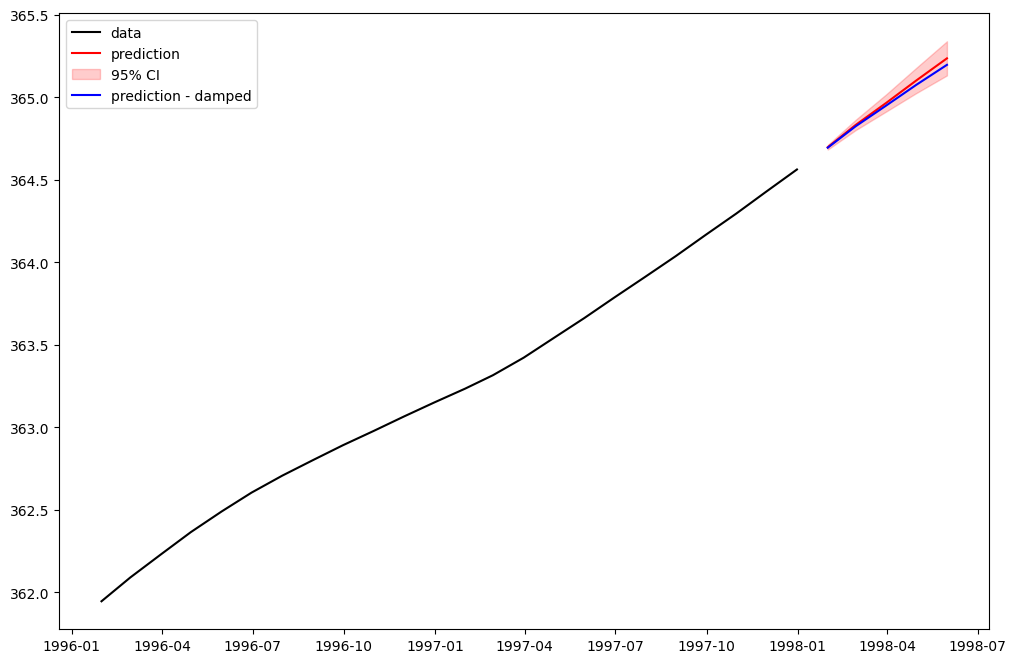

In [194]:
plt.figure(figsize = (12,8))
plt.plot(co2_trend.loc['1996':],label = 'data',color = 'black')
plt.plot(df_pred['mean'],label="prediction",color = 'red')
plt.fill_between(df_pred.index,df_pred['pi_upper'],df_pred['pi_lower'],label="95% CI",color = 'red',alpha = 0.2)
plt.plot(df_pred_d['mean'],label="prediction - damped", color = 'blue')
plt.legend()

### 8.3.- Methods with seasonality

In [169]:
import statsmodels.api as sm
#from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import acf
from sklearn.metrics import mean_absolute_error, r2_score

from statsmodels.tsa.seasonal import STL

from statsmodels.tsa.exponential_smoothing.ets import ETSModel

#Datasets: https://github.com/vincentarelbundock/Rdatasets/blob/master/datasets.csv
df = sm.datasets.get_rdataset('co2','datasets').data

df['time']=pd.date_range(start = '1959',end = '1998',freq='1M')
df.set_index('time',inplace = True)
#df = sm.datasets.get_rdataset('meteo','HSAUR').data

In [170]:
stl = STL(df, seasonal=13)
res = stl.fit()
trend_stl = res.trend
seasonal_stl = res.seasonal
resid_stl = res.resid

In [195]:
df_seasonal = pd.DataFrame(seasonal_stl)#df.rolling(window =12,center = False).mean()

c:\Users\HP\Documents\Codes\Forecasting\venv_forecasting\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                 ETS Results                                  
Dep. Variable:                 season   No. Observations:                   96
Model:                       ETS(ANA)   Log Likelihood                 218.564
Date:                Wed, 07 Feb 2024   AIC                           -405.127
Time:                        22:46:01   BIC                           -364.097
Sample:                    01-31-1990   HQIC                          -388.542
                         - 12-31-1997   Scale                            0.001
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.0001        nan        nan        nan         nan         nan
smoothing_seasonal      0.9998      0.120      8.361      0.000       0.765       1.234
initial_level   

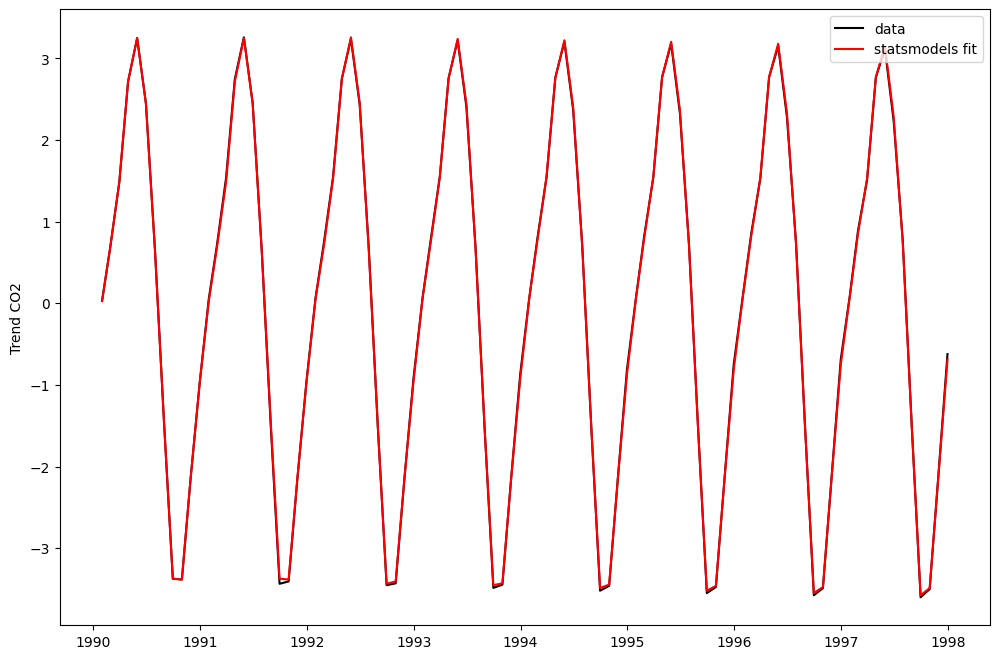

In [202]:
plt.figure(figsize = (12,8))

co2_season = df_seasonal['season'].loc['1990':]

model = ETSModel(co2_season,
                error='add', #"mul",
                trend = None,
                seasonal= "add",
                damped_trend=False)
                #seasonal_periods= )

fit = model.fit(maxiter=20000)

plt.plot(co2_season,label="data",color = 'black')
plt.plot(fit.fittedvalues,label="statsmodels fit",color = 'red')
plt.ylabel("Trend CO2")

# obtained from R
#params_R = [0.99989969, 0.11888177503085334, 0.80000197, 36.46466837, 34.72584983]
#yhat = model.smooth(params_R).fittedvalues
#yhat.plot(label="R fit", linestyle="--")

plt.legend()
print(fit_d.summary())

In [205]:
pred = fit.get_prediction(start="1998-01-31", end="2000-05-31")
df_pred = pred.summary_frame(alpha=0.05)

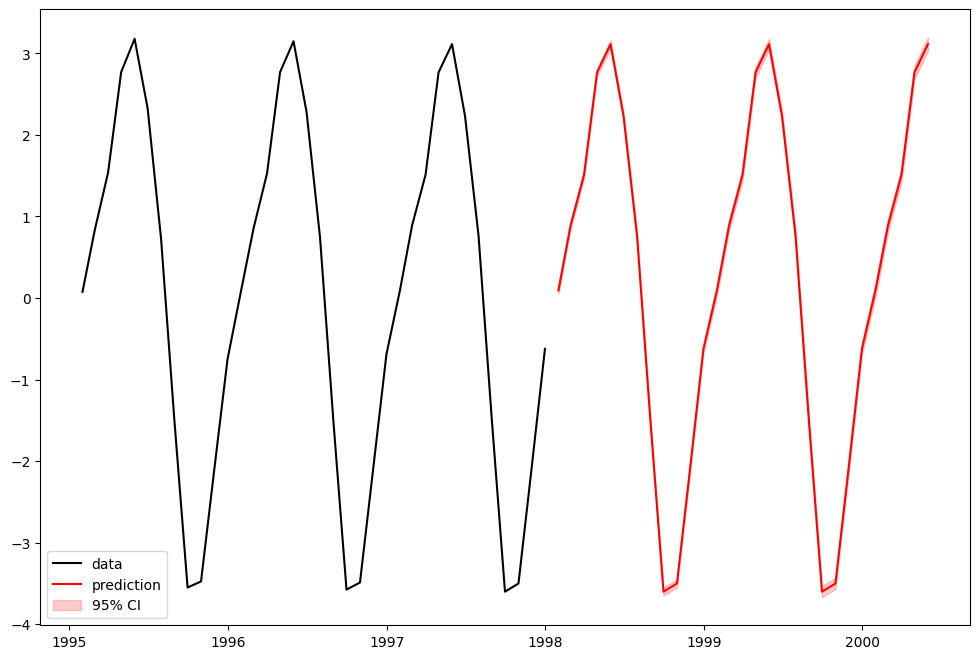

In [207]:
plt.figure(figsize = (12,8))
plt.plot(co2_season.loc['1995':],label = 'data',color = 'black')
plt.plot(df_pred['mean'],label="prediction",color = 'red')
plt.fill_between(df_pred.index,df_pred['pi_upper'],df_pred['pi_lower'],label="95% CI",color = 'red',alpha = 0.2)
#plt.plot(df_pred_d['mean'],label="prediction - damped", color = 'blue')
plt.legend()

### 8.4.- A taxonomy of exponential smoothing

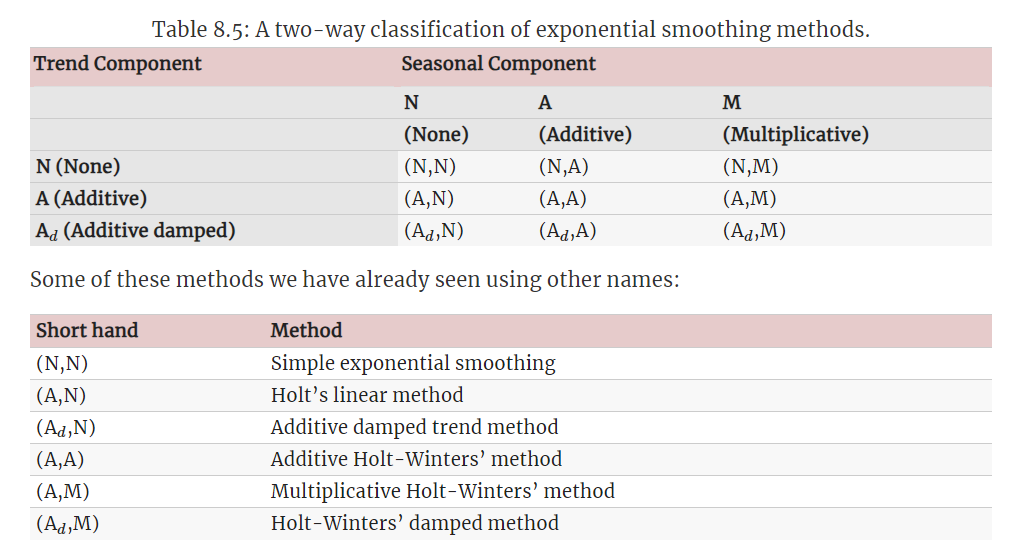

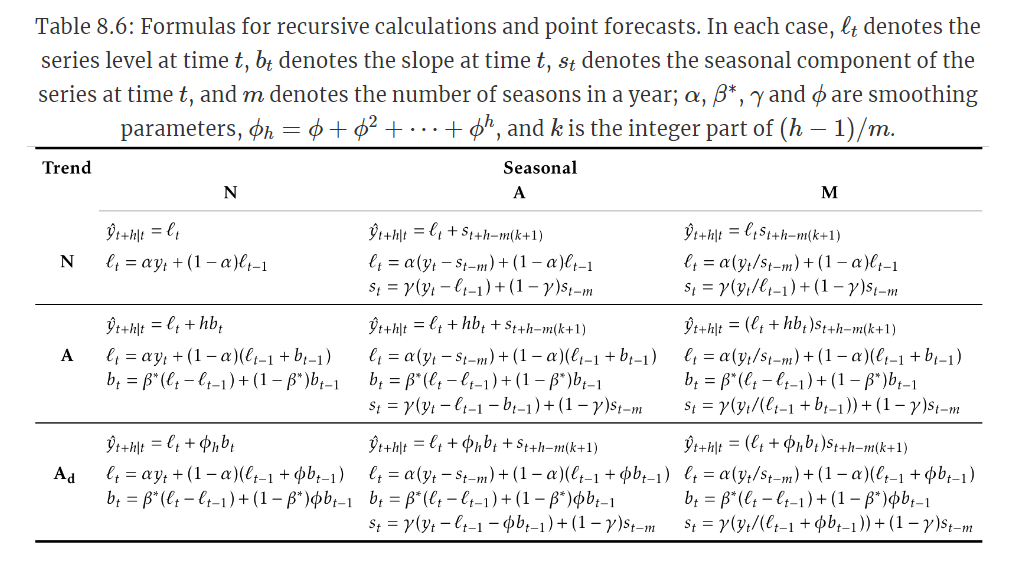

### 8.5.- Innovation state space model for exponential smoothing

"[...] A statistical model is a stochastic (or random) data generating process that can produce an entire forecast distribution. [...]"

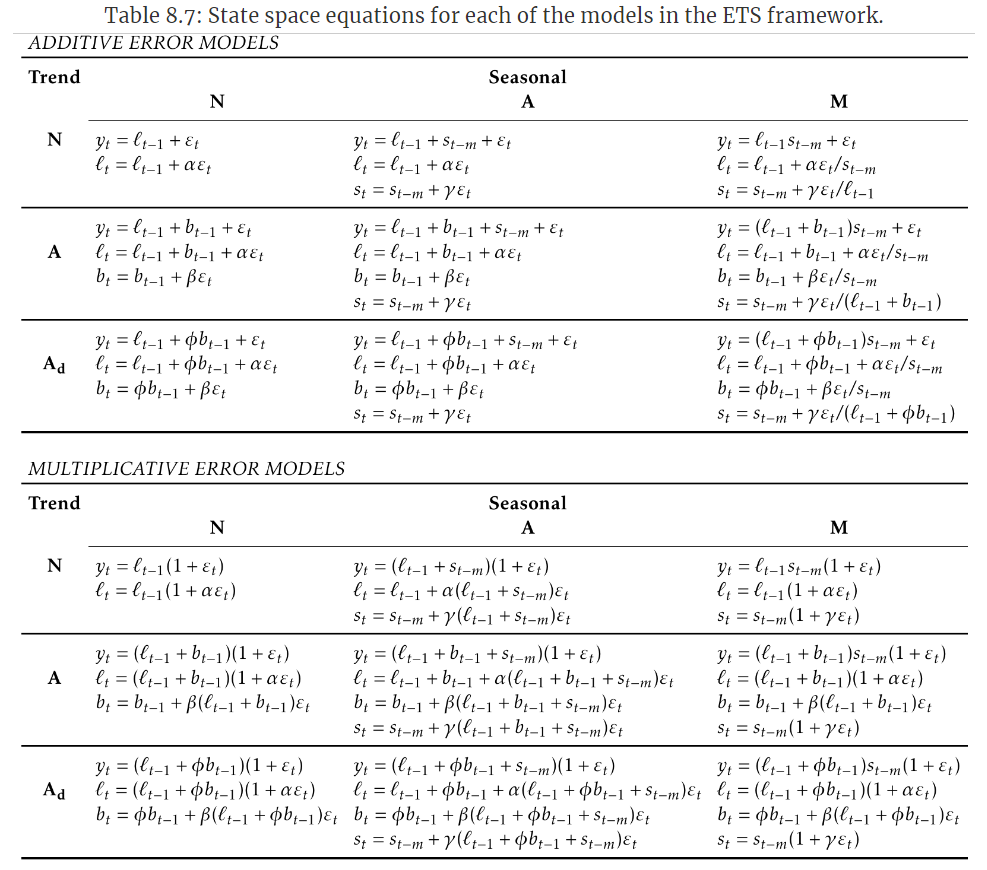

### 8.7 Forecasting with ETS models

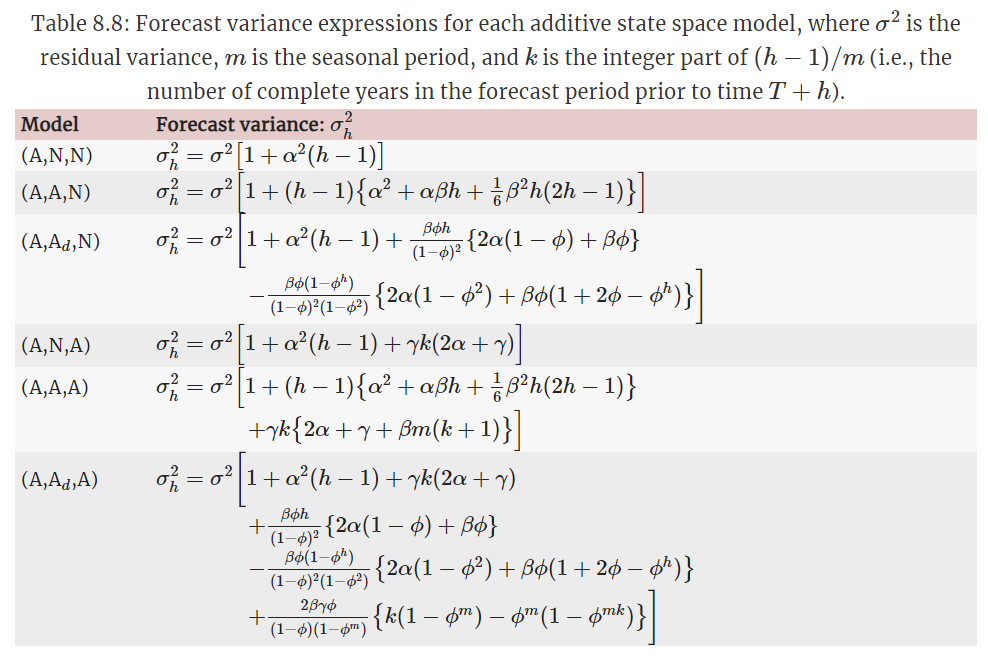

In [230]:
import statsmodels.api as sm
#from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import acf
from sklearn.metrics import mean_absolute_error, r2_score

from statsmodels.tsa.seasonal import STL

from statsmodels.tsa.exponential_smoothing.ets import ETSModel

#Datasets: https://github.com/vincentarelbundock/Rdatasets/blob/master/datasets.csv
df = sm.datasets.get_rdataset('austourists','fpp2').data

df['time']=pd.date_range(start = '1999',end = '2016',freq='3M')
df.set_index('time',inplace = True)
#df = sm.datasets.get_rdataset('meteo','HSAUR').data

In [239]:
austourists

time
1999-01-31    30.052513
1999-04-30    19.148496
1999-07-31    25.317692
1999-10-31    27.591437
2000-01-31    32.076456
                ...    
2014-10-31    59.834475
2015-01-31    73.257027
2015-04-30    47.696624
2015-07-31    61.097768
2015-10-31    66.055761
Name: value, Length: 68, dtype: float64

c:\Users\HP\Documents\Codes\Forecasting\venv_forecasting\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  self._init_dates(dates, freq)


                                 ETS Results                                  
Dep. Variable:                 season   No. Observations:                   96
Model:                       ETS(ANA)   Log Likelihood                 218.564
Date:                Wed, 07 Feb 2024   AIC                           -405.127
Time:                        23:22:03   BIC                           -364.097
Sample:                    01-31-1990   HQIC                          -388.542
                         - 12-31-1997   Scale                            0.001
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.0001        nan        nan        nan         nan         nan
smoothing_seasonal      0.9998      0.120      8.361      0.000       0.765       1.234
initial_level   

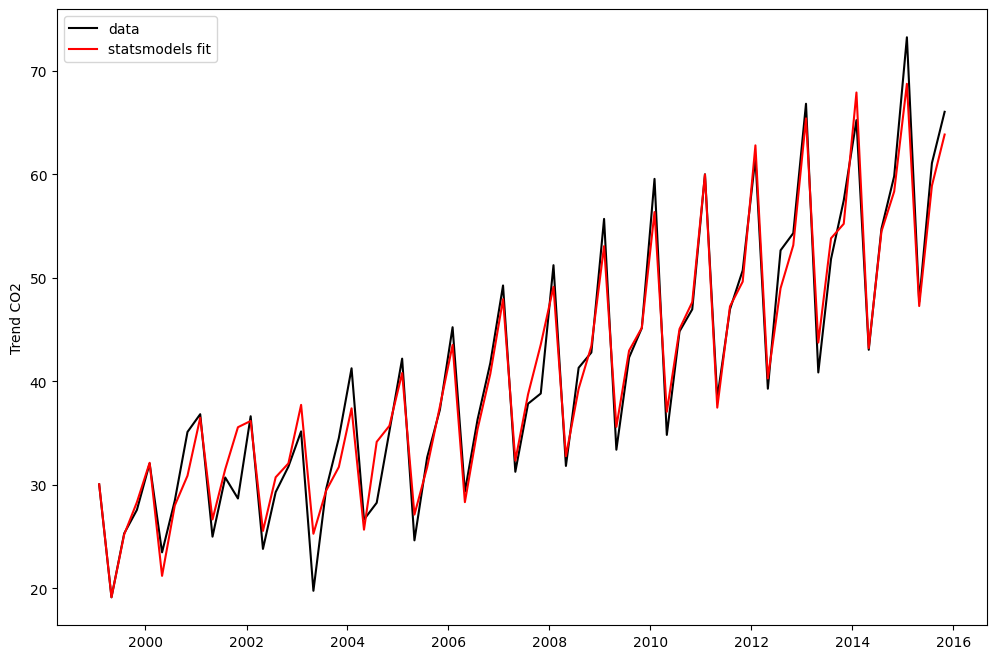

In [236]:
plt.figure(figsize = (12,8))

austourists = df['value']

model = ETSModel(austourists,
                error='add', #"mul",
                trend = 'add',
                seasonal= "add",
                damped_trend=False,
                seasonal_periods= 4)

fit = model.fit(maxiter=10000)

plt.plot(austourists,label="data",color = 'black')
plt.plot(fit.fittedvalues,label="statsmodels fit",color = 'red')
plt.ylabel("Trend CO2")

# obtained from R
#params_R = [0.99989969, 0.11888177503085334, 0.80000197, 36.46466837, 34.72584983]
#yhat = model.smooth(params_R).fittedvalues
#yhat.plot(label="R fit", linestyle="--")

plt.legend()
print(fit_d.summary())

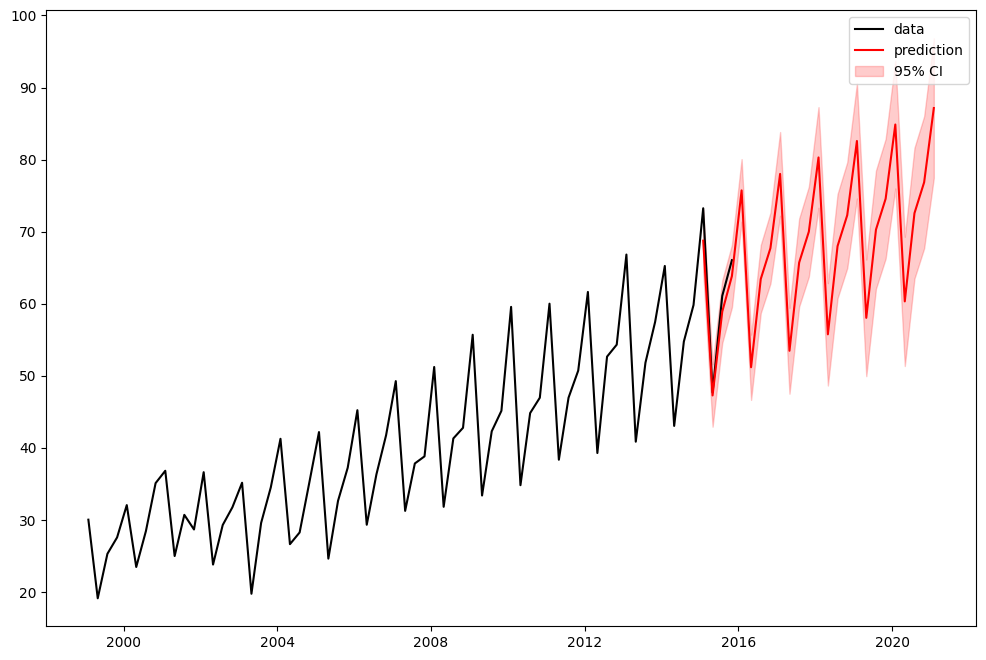

In [241]:
pred = fit.get_prediction(start="2015", end="2021")
df_pred = pred.summary_frame(alpha=0.05)

plt.figure(figsize = (12,8))
plt.plot(austourists,label = 'data',color = 'black')
plt.plot(df_pred['mean'],label="prediction",color = 'red')
plt.fill_between(df_pred.index,df_pred['pi_upper'],df_pred['pi_lower'],label="95% CI",color = 'red',alpha = 0.2)
#plt.plot(df_pred_d['mean'],label="prediction - damped", color = 'blue')
plt.legend()

## 9.- ARIMA models

ARIMA models provide another approach to time series forecasting. Exponential smoothing and ARIMA models are the two most widely used approaches to time series forecasting, and provide complementary approaches to the problem. While exponential smoothing models are based on a description of the trend and seasonality in the data, ARIMA models aim to describe the autocorrelations in the data.